In [1]:
from azureml.train.estimator import Estimator
from azureml.core import Experiment
from azureml.widgets import RunDetails

In [4]:
estimator = Estimator(source_directory='gatech.tippie01/scripts',
                      entry_script='testp.py',
                      compute_target='local',
                      use_docker=False,
                      script_params = {'--reg_rate': 0.07},
                      conda_packages=['scikit-learn'])

'Estimator' is deprecated. Please use 'ScriptRunConfig' from 'azureml.core.script_run_config' with your own defined environment or an Azure ML curated environment.


In [4]:
#reading the data
path = 'C:/Users/RK/Documents/_My Resume/Hakathons/Video Popularity Challenge'
meta_data0,desc_data0,title_data0,image_data0 = prep.data_read(path)

In [5]:
meta_data=meta_data0
desc_data=desc_data0
title_data=title_data0
image_data=image_data0
print(title_data)

      comp_id   title_1   title_2   title_3   title_4   title_5   title_6  \
0           1 -0.977637 -0.543310  0.079403  0.205560 -1.497104  0.230466   
1           2  0.041873  0.644655  0.140869 -0.664714 -0.062992  0.240086   
2           3 -0.905595  0.097928  0.111981 -0.064753 -1.566516  0.140807   
3           4  0.069220  0.411544  0.177700 -0.739998 -0.932620 -0.717982   
4           5  0.503560 -0.210970 -0.085412  0.549240 -0.019521 -0.255597   
...       ...       ...       ...       ...       ...       ...       ...   
2995     2996 -0.555790 -0.634473 -0.339856  0.005876  0.086831 -0.206456   
2996     2997 -0.584811 -0.578910  0.561006  0.384265  0.779752 -0.244268   
2997     2998  0.953752  0.033205 -0.462647  0.610091  0.642509  0.149174   
2998     2999 -1.830269 -0.981212  0.012925 -0.351799  0.915522 -1.061758   
2999     3000 -1.964440  0.990954  0.687315  0.333667  0.449629  0.011339   

       title_7   title_8   title_9  ...  title_41  title_42  title_43  \
0 

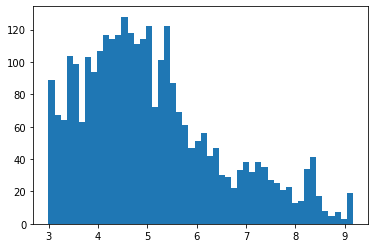

In [20]:
#log(meta_data).hist(column = ['views'],bins = 50, figsize =(10,10))
# histogram on linear scale
from numpy import log
hist, bins, _ = plt.hist(log(meta_data['views'].values), bins=50)
#prep.visuals('hist',meta_data['views'].values)


In [7]:
meta_data['hour'].values

array([6, 6, 6, ..., 4, 3, 3], dtype=int64)

In [23]:
anomay_index = prep.find_anomalies(meta_data.views)
meta_data=meta_data0.drop(anomay_index[1]).reset_index(drop=True)
desc_data=desc_data0.drop(anomay_index[1]).reset_index(drop=True)
title_data=title_data0.drop(anomay_index[1]).reset_index(drop=True)
image_data=image_data0.drop(anomay_index[1]).reset_index(drop=True)

In [24]:
meta_data['ad_blocked']=meta_data.ad_blocked.astype(int)
meta_data['embed']=meta_data.embed.astype(int)
meta_data['partner']=meta_data.ad_blocked.astype(int)
meta_data['partner_active']=meta_data.ad_blocked.astype(int)

In [25]:
image_data = image_data.iloc[:,1:4001] # change dimension for full data
meta_data = meta_data
desc_data = desc_data
title_data = title_data

In [31]:
image_data = prep.data_scale(image_data)
desc_data = prep.data_scale(desc_data)
title_data = prep.data_scale(title_data)

NameError: name 'means' is not defined

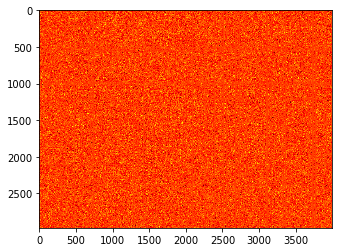

In [15]:
a = np.random.random((16, 16))
plt.imshow(image_data, cmap='hot', interpolation='nearest')
plt.show()

In [18]:
image_features = np.array(image_data)
labels_raw= log(meta_data['views'].values.reshape(-1,1).astype(float))
print(labels_raw)

[[5.66988092]
 [7.27447956]
 [5.79605775]
 ...
 [4.57471098]
 [4.34380542]
 [4.07753744]]


In [19]:
meta_features = meta_data.drop(['comp_id','views','embed'],axis = 1)
desc_features = desc_data.drop(['comp_id'],axis = 1)
title_features = title_data.drop(['comp_id'],axis = 1)
print(image_features.shape)
print(meta_features.values.shape)
print(desc_features.values.shape)
print(title_features.values.shape)



(2971, 4000)
(2971, 11)
(2971, 50)
(2971, 50)


In [20]:
image_meta = np.concatenate((image_features,meta_features.values,desc_features.values,title_features.values),axis=1)

In [21]:
print(image_meta.shape)
print(labels_raw.shape)

(2971, 4111)
(2971, 1)


In [22]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split
#X_train_meta, X_test_meta, y_train_meta, y_test_meta = train_test_split(meta_features, labels_raw, test_size=0.2, random_state=6250)

X_train_meta, X_test_meta, y_train_meta, y_test_meta = train_test_split(image_meta, labels_raw, test_size=0.2, random_state=6250)
X_train_meta, X_valid_meta, y_train_meta, y_valid_meta = train_test_split(X_train_meta, y_train_meta, test_size=0.2, random_state=6250)


In [32]:
print(X_train_meta[0:5,4000:4011])

[[0.00000e+00 1.77778e+00 2.90000e+01 2.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 6.00000e+00 5.00000e+00 5.00000e+00]
 [0.00000e+00 1.77778e+00 3.33000e+03 2.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 6.00000e+00 5.00000e+00 1.00000e+00 2.00000e+01]
 [0.00000e+00 1.77778e+00 1.02400e+03 2.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 1.30000e+01 6.00000e+00 2.00000e+00 1.80000e+01]
 [0.00000e+00 1.76667e+00 1.32000e+02 4.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 4.00000e+00 7.00000e+00 5.00000e+00]
 [0.00000e+00 1.77778e+00 1.80000e+01 2.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 5.00000e+00 7.00000e+00 5.00000e+00]]


In [24]:
print(meta_data0[0:5])

   comp_id  ad_blocked  embed    ratio  duration  language  partner  \
0        1       False   True  1.77778        86         3     True   
1        2       False   True  1.33333      1129         2     True   
2        3       False   True  1.76667      1163         2     True   
3        4       False   True  1.77778      1326         2     True   
4        5       False   True  1.77273      2612         2     True   

   partner_active  n_likes  views  n_tags  n_formats  dayofweek  hour  
0           False        0    290       3          0          5     6  
1           False        0   1443       0          2          5     6  
2           False        0    329       0          1          5     6  
3           False        0     63       0          3          5     6  
4           False        3     37       0          0          5     6  


In [25]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# lets fix the random seeds for reproducibility.
torch.manual_seed(6250)
if torch.cuda.is_available():
    torch.cuda.manual_seed(6250)

trainset = TensorDataset(torch.from_numpy(X_train_meta.astype('float32')).unsqueeze(1), torch.from_numpy(y_train_meta.astype('float32')))
trainloader = torch.utils.data.DataLoader(trainset, batch_size=10, shuffle=True, num_workers=2)

validset = TensorDataset(torch.from_numpy(X_valid_meta.astype('float32')).unsqueeze(1), torch.from_numpy(y_valid_meta.astype('float32')))
validloader = torch.utils.data.DataLoader(validset, batch_size=10, shuffle=False, num_workers=2)

testset = TensorDataset(torch.from_numpy(X_test_meta.astype('float32')).unsqueeze(1), torch.from_numpy(y_test_meta.astype('float32')))
testloader = torch.utils.data.DataLoader(testset, batch_size=10, shuffle=False, num_workers=2)

In [313]:
dataiter = iter(trainloader)
X_samples, y_samples = dataiter.next()

print(X_samples)
print(y_samples)
#print(y_train_meta)

tensor([[[-0.1938,  0.0955,  0.0127,  ..., -0.1780, -0.0526, -0.1268]],

        [[ 0.1124, -0.0656, -0.0093,  ...,  0.1208, -0.0745, -0.0660]],

        [[ 0.0470,  0.0519, -0.0053,  ...,  0.2050,  0.0522,  0.0467]],

        ...,

        [[-0.1679, -0.2421, -0.0226,  ..., -0.0076, -0.0630,  0.0333]],

        [[-0.0522,  0.1655,  0.1113,  ..., -0.0437, -0.0070,  0.0526]],

        [[-0.0884, -0.2850,  0.0850,  ..., -0.1268, -0.1214, -0.0093]]])
tensor([[0.3069],
        [0.3338],
        [0.2912],
        [0.1745],
        [0.2583],
        [0.2813],
        [0.2452],
        [0.1533],
        [0.2004],
        [0.2251]])


In [33]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

class ResidualBlock(nn.Module):
    def __init__(self, in_channel, out_channel,stride=1, downsample=None):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channel, out_channel, kernel_size = 3, stride = stride, padding=1)
        self.bn1 = nn.BatchNorm2d(out_channel)
        self.relu = nn.ReLU()
        self.conv2 = nn.Conv2d(out_channel, out_channel, kernel_size = 3, stride = 1, padding=1)  #we change the size only once
        self.bn2 = nn.BatchNorm2d(out_channel)
        self.downsample = downsample
    def forward(self,x):
        residual = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        if self.downsample:#to be used when input size does not match output size
            residual = self.downsample(x)
        out += residual
        out = self.relu(out)
        return(out)

In [41]:
class ResNet(nn.Module):
    def __init__(self, block, num_classes=1):#num_classes=10):
        super(ResNet, self).__init__()
        self.in_channel = 16 #self.in_channel = 16
        self.conv1 = nn.Conv2d(1, 16, stride =1, kernel_size = 3, padding = 1)
        self.bn = nn.BatchNorm2d(16)
        self.relu = nn.ReLU()
        self.block1 = self.make_layer(block, 16, 1)
        self.block2 = self.make_layer(block, 16, 1)
        torch.autograd.set_detect_anomaly(True)
        self.block3 = self.make_layer(block, 32, 2)
        self.block4 = self.make_layer(block, 32, 1)
        self.block5 = self.make_layer(block, 64, 2)
        self.block6 = self.make_layer(block, 64, 1)
        self.avg_pool = nn.AvgPool2d(8) #8 is the kernel size so it is taking average of 8x8 ## output is 8000
        self.fc = nn.Linear(8000, num_classes)
    def make_layer(self, block, out_channel, stride=1):
        downsample = None
        if(stride!=1) or (self.in_channel != out_channel):#input size not equal to output size only when stride not 1 or input channel and output channel are not same 
            downsample = nn.Sequential(
            nn.Conv2d(self.in_channel, out_channel, kernel_size = 3, stride = stride, padding = 1),
            nn.BatchNorm2d(out_channel))
        out_layer = block(self.in_channel, out_channel, stride, downsample)
        self.in_channel = out_channel
        return(out_layer)
    def forward(self,x):
        #print(x.shape)
        out = self.conv1(x)
        out = self.bn(out)
        out = self.relu(out)
        #print(out.shape)
        out = self.block1(out)
        #print(out.shape)
        out = self.block2(out)
        #print(out.shape)
        out = self.block3(out)
        #print(out.shape)
        out = self.block4(out)
        #print(out.shape)
        out = self.block5(out)
        #print(out.shape)
        out = self.block6(out)
        #print(out.shape)
        out = self.avg_pool(out)
        #print(out.shape)
        out = out.view(out.size(0), -1)
        #print(out.shape)
        out = self.fc(out)
        return out
    
model_res = ResNet(ResidualBlock)

In [57]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import math
class FeedForwardNet(nn.Module):
    def __init__(self,n_input, n_hidden, n_output):
        super(FeedForwardNet, self).__init__()
        self.hidden1 = nn.Linear(n_input, n_hidden)
        #self.drop1 = nn.Dropout(0.50)
        self.hidden2 = nn.Linear(n_hidden, 36)
        #self.drop2 = nn.Dropout(0.25)
        self.hidden3 = nn.Linear(36, 56)
        
        self.hidden4 = nn.Linear(56, n_output)
        #self.drop3 = nn.Dropout(0.25)
        #self.out = nn.Linear(16, n_output)

    def forward(self, x):
        #print(x.shape)
        x = F.relu(self.hidden1(x))
        #x = self.hidden1(x)
        #x = self.drop1(x)
        x = F.relu(self.hidden2(x))
        x = F.relu(self.hidden3(x))
        #x = self.drop2(x)
        x = self.hidden4(x)
        
        #x = self.drop3(x)
        #x = self.out(x)
        return x

net = FeedForwardNet(n_input=50, n_hidden=16, n_output=1)

In [78]:
def normal_init(m, mean=4, std=1.5):
    if isinstance(m, (nn.Linear, nn.Conv2d)):
        m.weight.data.normal_(mean, std)
        if m.bias.data is not None:
            m.bias.data.zero_()
    elif isinstance(m, (nn.BatchNorm2d, nn.BatchNorm1d)):
        m.weight.data.fill_(1)
        if m.bias.data is not None:
            m.bias.data.zero_()

In [151]:
## Concatenation of the models (raw model)
class MyModel(nn.Module):
    def __init__(self, ResidualBlock,
                meta_input, meta_hidden, meta_output,
                desc_input, desc_hidden, desc_output,
                title_input, title_hiden, title_output):
        super(MyModel, self).__init__()
        self.cnn = ResNet(ResidualBlock)
        self.lin1 = FeedForwardNet(meta_input, meta_hidden, meta_output)
        self.lin2 = FeedForwardNet(desc_input, desc_hidden, desc_output)
        self.lin3 = FeedForwardNet(title_input, title_hiden, title_output)
        #self.cnn.fc = nn.Linear(
        #    self.cnn.fc.in_features, 80)
        
        self.fc1 = nn.Linear(8000 + meta_output + title_output + desc_output, 60)
        self.fc2 = nn.Linear(60, 1)
        
        self.weight_init()

    def weight_init(self):
        for block in self._modules:
            try:
                for m in self._modules[block]:
                    normal_init(m)
            except:
                normal_init(block)
                
    def forward(self, image_data1,meta_data1,desc_featurs1,title_features1):
        x1 = self.cnn(image_data1)
        #print(x1)
        x2 = self.lin1(meta_data1)
        x3 = self.lin2(desc_featurs1)
        x4 = self.lin3(title_features1)
        x = torch.cat((x1, x2, x3, x4), dim=1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
        

modelX = MyModel(ResidualBlock,
                 meta_input = 11,meta_hidden=16, meta_output=12,
                 desc_input = 50,desc_hidden=32, desc_output=16,
                 title_input = 50, title_hiden = 32,title_output =16)



#print(X_samples.shape)
#print(y_samples.shape)


In [52]:
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.0001) # for metadata
#optimizer = optim.SGD(net.parameters(), lr=0.001)

In [318]:
def weights_init_uniform(m):
    classname = m.__class__.__name__
        # for every Linear layer in a model..
    if classname.find('Linear') != -1:
            # apply a uniform distribution to the weights and a bias=0
        m.weight.data.uniform_(0.0, 1.0)
        m.bias.data.fill_(0)

In [286]:
train_losses = []
valid_losses = []
num_epochs=10

for epoch in range(num_epochs):  # loop over the dataset multiple times

    # set the model as train mode
    train_loss = 0.0
    train_counter = 0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, targets = data
        image_data1 = inputs[:,:,0:4000].unsqueeze(1)
        meta_data1 = inputs[:,:,4000:4011].squeeze(1)
        desc_featurs1 = inputs[:,:,4011:4061].squeeze(1)
        title_features1 = inputs[:,:,4061:4111].squeeze(1)
        #print(inputs)
        #torch.autograd.set_detect_anomaly(True)
       # if cuda:
        #    inputs, targets = inputs.cuda(), targets.cuda()

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(meta_data1)
        #outputs = modelX(image_data1,meta_data1,desc_featurs1,title_features1)
        
        loss = torch.sqrt(criterion(outputs, targets))
        loss.backward()
        print(targets)
        #print(loss.grad_fn.next_functions[0][0].next_functions[0][0])
        #scheduler.step()
        print("********************************************")
        print(targets)
        print(outputs)
        print(loss)
        print("********************************************")
        optimizer.step()
        #print(optimizer)

        
        train_loss += (loss.item() * inputs.size(0))
        train_counter += inputs.size(0)
        #print(train_loss)
    train_losses.append(train_loss/train_counter)
    

tensor([[0.2612],
        [0.1973],
        [0.1956],
        [0.1912],
        [0.2048],
        [0.1862],
        [0.1536],
        [0.2167],
        [0.1558],
        [0.2009]])
********************************************
tensor([[0.2612],
        [0.1973],
        [0.1956],
        [0.1912],
        [0.2048],
        [0.1862],
        [0.1536],
        [0.2167],
        [0.1558],
        [0.2009]])
tensor([[ 2.1450],
        [97.2058],
        [ 4.3061],
        [ 5.1570],
        [ 0.9378],
        [ 2.2976],
        [ 4.6990],
        [ 3.2806],
        [68.8808],
        [12.7225]], grad_fn=<AddmmBackward>)
tensor(37.9087, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2136],
        [0.1815],
        [0.2791],
        [0.2289],
        [0.1810],
        [0.2484],
        [0.1806],
        [0.1993],
        [0.1415],
        [0.1840]])
********************************************
tensor([[0.2136],
        [0.1815],
        [0.2791],
        [0.2

        [-0.0305]], grad_fn=<AddmmBackward>)
tensor(0.1710, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1816],
        [0.2045],
        [0.1301],
        [0.2404],
        [0.3147],
        [0.1294],
        [0.1681],
        [0.3147],
        [0.2295],
        [0.2885]])
********************************************
tensor([[0.1816],
        [0.2045],
        [0.1301],
        [0.2404],
        [0.3147],
        [0.1294],
        [0.1681],
        [0.3147],
        [0.2295],
        [0.2885]])
tensor([[-0.0140],
        [-0.0896],
        [ 0.8236],
        [ 0.0423],
        [-0.1187],
        [-0.1097],
        [ 0.4958],
        [-0.1069],
        [-0.0177],
        [ 0.5668]], grad_fn=<AddmmBackward>)
tensor(0.3625, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2206],
        [0.1872],
        [0.3107],
        [0.1898],
        [0.1779],
        [0.1339],
        [0.2115],
        [0.3107],
        [0.2302],
  

        [0.3189]])
********************************************
tensor([[0.2627],
        [0.2158],
        [0.1361],
        [0.2442],
        [0.2495],
        [0.2791],
        [0.1200],
        [0.2543],
        [0.1624],
        [0.3189]])
tensor([[ 0.2146],
        [-0.0693],
        [-0.0685],
        [-0.0646],
        [-0.0734],
        [-0.1036],
        [-0.0841],
        [-0.0816],
        [ 0.3576],
        [ 0.0745]], grad_fn=<AddmmBackward>)
tensor(0.2690, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2222],
        [0.1764],
        [0.3189],
        [0.2217],
        [0.2452],
        [0.2912],
        [0.2836],
        [0.1267],
        [0.2054],
        [0.1454]])
********************************************
tensor([[0.2222],
        [0.1764],
        [0.3189],
        [0.2217],
        [0.2452],
        [0.2912],
        [0.2836],
        [0.1267],
        [0.2054],
        [0.1454]])
tensor([[-0.0639],
        [ 0.0988],
        [-

tensor([[0.2061],
        [0.1706],
        [0.2912],
        [0.1916],
        [0.2597],
        [0.2414],
        [0.1822],
        [0.1189],
        [0.3338],
        [0.1854]])
tensor([[ 0.1507],
        [ 0.8525],
        [-0.0161],
        [ 0.1237],
        [ 0.0152],
        [ 0.0128],
        [-0.0295],
        [-0.0299],
        [ 0.0483],
        [ 0.2501]], grad_fn=<AddmmBackward>)
tensor(0.2884, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2071],
        [0.1949],
        [0.2269],
        [0.3107],
        [0.1705],
        [0.2111],
        [0.2051],
        [0.3069],
        [0.1724],
        [0.1500]])
********************************************
tensor([[0.2071],
        [0.1949],
        [0.2269],
        [0.3107],
        [0.1705],
        [0.2111],
        [0.2051],
        [0.3069],
        [0.1724],
        [0.1500]])
tensor([[ 0.3701],
        [-0.0039],
        [-0.0326],
        [-0.0461],
        [ 0.0168],
        [ 0.2829]

tensor(0.1989, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.3034],
        [0.1470],
        [0.1751],
        [0.2749],
        [0.2556],
        [0.2012],
        [0.1625],
        [0.1805],
        [0.3285],
        [0.1612]])
********************************************
tensor([[0.3034],
        [0.1470],
        [0.1751],
        [0.2749],
        [0.2556],
        [0.2012],
        [0.1625],
        [0.1805],
        [0.3285],
        [0.1612]])
tensor([[ 0.3633],
        [ 0.0100],
        [ 0.1443],
        [-0.0249],
        [ 0.4808],
        [ 0.0463],
        [ 0.3430],
        [-0.0062],
        [ 0.0823],
        [ 0.0047]], grad_fn=<AddmmBackward>)
tensor(0.1845, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2111],
        [0.2495],
        [0.2519],
        [0.1355],
        [0.1646],
        [0.1879],
        [0.2940],
        [0.1634],
        [0.2269],
        [0.2309]])
****************************

tensor([[0.1818],
        [0.2813],
        [0.2711],
        [0.1845],
        [0.2675],
        [0.1141],
        [0.2404],
        [0.2484],
        [0.2749],
        [0.2222]])
tensor([[-0.0278],
        [-0.0313],
        [-0.0400],
        [-0.0186],
        [-0.0412],
        [-0.0221],
        [-0.0272],
        [-0.0329],
        [-0.0337],
        [-0.0134]], grad_fn=<AddmmBackward>)
tensor(0.2636, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1628],
        [0.2158],
        [0.1676],
        [0.1789],
        [0.2730],
        [0.1358],
        [0.2108],
        [0.2813],
        [0.3338],
        [0.2282]])
********************************************
tensor([[0.1628],
        [0.2158],
        [0.1676],
        [0.1789],
        [0.2730],
        [0.1358],
        [0.2108],
        [0.2813],
        [0.3338],
        [0.2282]])
tensor([[-0.0164],
        [ 0.6898],
        [-0.0236],
        [-0.0089],
        [-0.0359],
        [-0.0244]

        [0.2269]])
********************************************
tensor([[0.1978],
        [0.1852],
        [0.1570],
        [0.1221],
        [0.1980],
        [0.1310],
        [0.2162],
        [0.1945],
        [0.2167],
        [0.2269]])
tensor([[ 1.3094e-01],
        [ 2.0657e-01],
        [-3.4017e-04],
        [ 2.1857e-01],
        [ 1.1194e-01],
        [ 1.0205e-01],
        [ 4.7244e-01],
        [ 1.0647e-02],
        [ 3.0903e-01],
        [ 3.8348e-04]], grad_fn=<AddmmBackward>)
tensor(0.1437, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2239],
        [0.1980],
        [0.2222],
        [0.2362],
        [0.2201],
        [0.1908],
        [0.1647],
        [0.1206],
        [0.2068],
        [0.1569]])
********************************************
tensor([[0.2239],
        [0.1980],
        [0.2222],
        [0.2362],
        [0.2201],
        [0.1908],
        [0.1647],
        [0.1206],
        [0.2068],
        [0.1569]])
tensor([

        [0.1420]])
********************************************
tensor([[0.1727],
        [0.2836],
        [0.2519],
        [0.2257],
        [0.1419],
        [0.2749],
        [0.2167],
        [0.2643],
        [0.1276],
        [0.1420]])
tensor([[ 0.0281],
        [-0.0021],
        [ 0.0135],
        [ 0.0121],
        [ 0.0275],
        [ 0.0050],
        [ 0.6823],
        [ 0.0096],
        [ 0.0802],
        [ 0.0222]], grad_fn=<AddmmBackward>)
tensor(0.2427, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1655],
        [0.2404],
        [0.1604],
        [0.2387],
        [0.1539],
        [0.2860],
        [0.3069],
        [0.1411],
        [0.1785],
        [0.2569]])
********************************************
tensor([[0.1655],
        [0.2404],
        [0.1604],
        [0.2387],
        [0.1539],
        [0.2860],
        [0.3069],
        [0.1411],
        [0.1785],
        [0.2569]])
tensor([[ 0.0573],
        [ 0.1750],
        [ 

********************************************
tensor([[0.1193],
        [0.2860],
        [0.2970],
        [0.1775],
        [0.2769],
        [0.2018],
        [0.1368],
        [0.2289],
        [0.1998],
        [0.1445]])
********************************************
tensor([[0.1193],
        [0.2860],
        [0.2970],
        [0.1775],
        [0.2769],
        [0.2018],
        [0.1368],
        [0.2289],
        [0.1998],
        [0.1445]])
tensor([[-0.0226],
        [-0.0225],
        [ 0.4146],
        [-0.0226],
        [-0.0208],
        [-0.0097],
        [ 0.0315],
        [-0.0225],
        [ 0.1369],
        [-0.0226]], grad_fn=<AddmmBackward>)
tensor(0.2022, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2217],
        [0.2463],
        [0.1191],
        [0.2018],
        [0.3069],
        [0.1591],
        [0.1624],
        [0.2556],
        [0.1207],
        [0.2136]])
********************************************
tensor([[0.2217],
    

tensor(0.2151, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1998],
        [0.2176],
        [0.1745],
        [0.1869],
        [0.1895],
        [0.1780],
        [0.3107],
        [0.1602],
        [0.1761],
        [0.3338]])
********************************************
tensor([[0.1998],
        [0.2176],
        [0.1745],
        [0.1869],
        [0.1895],
        [0.1780],
        [0.3107],
        [0.1602],
        [0.1761],
        [0.3338]])
tensor([[0.1293],
        [0.0147],
        [0.1381],
        [0.0901],
        [0.1871],
        [0.0284],
        [0.3452],
        [0.1830],
        [0.1029],
        [0.0049]], grad_fn=<AddmmBackward>)
tensor(0.1395, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2222],
        [0.3107],
        [0.3001],
        [0.1354],
        [0.2473],
        [0.2282],
        [0.1455],
        [0.2309],
        [0.1660],
        [0.1860]])
**************************************

tensor(0.1854, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2970],
        [0.2912],
        [0.1956],
        [0.1877],
        [0.1398],
        [0.1507],
        [0.2404],
        [0.2675],
        [0.3147],
        [0.2276]])
********************************************
tensor([[0.2970],
        [0.2912],
        [0.1956],
        [0.1877],
        [0.1398],
        [0.1507],
        [0.2404],
        [0.2675],
        [0.3147],
        [0.2276]])
tensor([[0.0354],
        [0.0329],
        [0.0061],
        [0.0247],
        [0.0210],
        [0.0133],
        [0.6666],
        [0.4451],
        [0.0541],
        [0.0074]], grad_fn=<AddmmBackward>)
tensor(0.2367, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2452],
        [0.2473],
        [0.1690],
        [0.1765],
        [0.1993],
        [0.3235],
        [0.3189],
        [0.1862],
        [0.2519],
        [0.1789]])
**************************************

tensor([[0.1882],
        [0.2346],
        [0.1954],
        [0.1673],
        [0.1649],
        [0.2495],
        [0.2912],
        [0.1575],
        [0.1608],
        [0.2543]])
tensor([[0.0365],
        [0.0504],
        [0.0255],
        [0.0665],
        [0.0407],
        [0.0301],
        [0.0188],
        [0.2985],
        [0.0659],
        [0.4191]], grad_fn=<AddmmBackward>)
tensor(0.1702, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1444],
        [0.2104],
        [0.1926],
        [0.2940],
        [0.2092],
        [0.2104],
        [0.1441],
        [0.2100],
        [0.1636],
        [0.2452]])
********************************************
tensor([[0.1444],
        [0.2104],
        [0.1926],
        [0.2940],
        [0.2092],
        [0.2104],
        [0.1441],
        [0.2100],
        [0.1636],
        [0.2452]])
tensor([[0.1598],
        [0.0352],
        [0.0295],
        [0.2900],
        [0.1552],
        [0.0251],
        [0.035

tensor([[0.0284],
        [0.0448],
        [0.1821],
        [0.0610],
        [0.1682],
        [0.0485],
        [0.0578],
        [0.0492],
        [0.0675],
        [0.0350]], grad_fn=<AddmmBackward>)
tensor(0.1559, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1904],
        [0.2442],
        [0.2111],
        [0.2295],
        [0.2251],
        [0.2414],
        [0.2463],
        [0.1954],
        [0.1877],
        [0.3107]])
********************************************
tensor([[0.1904],
        [0.2442],
        [0.2111],
        [0.2295],
        [0.2251],
        [0.2414],
        [0.2463],
        [0.1954],
        [0.1877],
        [0.3107]])
tensor([[0.0576],
        [0.1501],
        [0.1851],
        [0.3857],
        [0.0677],
        [0.0381],
        [0.0601],
        [0.1021],
        [0.0415],
        [0.0561]], grad_fn=<AddmmBackward>)
tensor(0.1572, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.24

tensor(0.1272, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1644],
        [0.2912],
        [0.1526],
        [0.2167],
        [0.2331],
        [0.2362],
        [0.2970],
        [0.2140],
        [0.2167],
        [0.2583]])
********************************************
tensor([[0.1644],
        [0.2912],
        [0.1526],
        [0.2167],
        [0.2331],
        [0.2362],
        [0.2970],
        [0.2140],
        [0.2167],
        [0.2583]])
tensor([[0.1447],
        [0.0955],
        [0.1378],
        [0.6291],
        [0.0804],
        [0.0758],
        [0.0885],
        [0.1731],
        [0.0675],
        [0.0825]], grad_fn=<AddmmBackward>)
tensor(0.1888, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2162],
        [0.2323],
        [0.2940],
        [0.2042],
        [0.1826],
        [0.1351],
        [0.1825],
        [0.2749],
        [0.3285],
        [0.2404]])
**************************************

        [0.0882]], grad_fn=<AddmmBackward>)
tensor(0.1708, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1229],
        [0.2442],
        [0.2813],
        [0.1276],
        [0.3189],
        [0.1218],
        [0.1200],
        [0.1339],
        [0.2331],
        [0.2473]])
********************************************
tensor([[0.1229],
        [0.2442],
        [0.2813],
        [0.1276],
        [0.3189],
        [0.1218],
        [0.1200],
        [0.1339],
        [0.2331],
        [0.2473]])
tensor([[0.2751],
        [0.0605],
        [0.0638],
        [0.0815],
        [0.2621],
        [0.0991],
        [0.0782],
        [0.2258],
        [0.0620],
        [0.2946]], grad_fn=<AddmmBackward>)
tensor(0.1232, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1295],
        [0.2323],
        [0.1567],
        [0.3189],
        [0.2018],
        [0.2659],
        [0.2569],
        [0.1678],
        [0.3285],
        [0.22

tensor([[0.1541],
        [0.2309],
        [0.3001],
        [0.2730],
        [0.2749],
        [0.1874],
        [0.2033],
        [0.1914],
        [0.1650],
        [0.1990]])
tensor([[0.0838],
        [0.0383],
        [0.0563],
        [0.1465],
        [0.0807],
        [0.0577],
        [0.0338],
        [0.0499],
        [0.0392],
        [0.3330]], grad_fn=<AddmmBackward>)
tensor(0.1595, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2912],
        [0.1884],
        [0.1193],
        [0.1968],
        [0.2071],
        [0.1197],
        [0.1959],
        [0.1419],
        [0.1882],
        [0.3338]])
********************************************
tensor([[0.2912],
        [0.1884],
        [0.1193],
        [0.1968],
        [0.2071],
        [0.1197],
        [0.1959],
        [0.1419],
        [0.1882],
        [0.3338]])
tensor([[0.0723],
        [0.0406],
        [0.1867],
        [0.0460],
        [0.0623],
        [0.0621],
        [0.054

tensor(0.1355, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.3235],
        [0.1846],
        [0.1148],
        [0.2912],
        [0.3034],
        [0.2912],
        [0.2009],
        [0.1505],
        [0.1996],
        [0.2940]])
********************************************
tensor([[0.3235],
        [0.1846],
        [0.1148],
        [0.2912],
        [0.3034],
        [0.2912],
        [0.2009],
        [0.1505],
        [0.1996],
        [0.2940]])
tensor([[0.0675],
        [0.0830],
        [0.1020],
        [0.0822],
        [0.1047],
        [0.1276],
        [0.0765],
        [0.1264],
        [0.0779],
        [0.1691]], grad_fn=<AddmmBackward>)
tensor(0.1525, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2331],
        [0.1837],
        [0.1904],
        [0.2201],
        [0.1887],
        [0.2675],
        [0.2836],
        [0.2004],
        [0.2082],
        [0.2396]])
**************************************

tensor(0.1300, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2791],
        [0.2015],
        [0.1334],
        [0.2171],
        [0.2302],
        [0.2414],
        [0.1750],
        [0.2015],
        [0.1575],
        [0.2289]])
********************************************
tensor([[0.2791],
        [0.2015],
        [0.1334],
        [0.2171],
        [0.2302],
        [0.2414],
        [0.1750],
        [0.2015],
        [0.1575],
        [0.2289]])
tensor([[0.5581],
        [0.2488],
        [0.1080],
        [0.2334],
        [0.3147],
        [0.1207],
        [0.2709],
        [0.1708],
        [0.1117],
        [0.2325]], grad_fn=<AddmmBackward>)
tensor(0.1072, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.3235],
        [0.2316],
        [0.1956],
        [0.1705],
        [0.1827],
        [0.2583],
        [0.1780],
        [0.2769],
        [0.1355],
        [0.1167]])
**************************************

tensor([[0.1815],
        [0.1502],
        [0.2239],
        [0.3034],
        [0.1285],
        [0.2396],
        [0.2627],
        [0.2813],
        [0.2127],
        [0.1908]])
********************************************
tensor([[0.1815],
        [0.1502],
        [0.2239],
        [0.3034],
        [0.1285],
        [0.2396],
        [0.2627],
        [0.2813],
        [0.2127],
        [0.1908]])
tensor([[0.1992],
        [0.4606],
        [0.0629],
        [0.0724],
        [0.0657],
        [0.1010],
        [0.0616],
        [0.0710],
        [0.1451],
        [0.1437]], grad_fn=<AddmmBackward>)
tensor(0.1704, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2643],
        [0.3285],
        [0.1437],
        [0.2970],
        [0.1895],
        [0.2452],
        [0.1675],
        [0.2027],
        [0.2791],
        [0.2519]])
********************************************
tensor([[0.2643],
        [0.3285],
        [0.1437],
        [0.2970],
     

********************************************
tensor([[0.1795],
        [0.1875],
        [0.1571],
        [0.1649],
        [0.2127],
        [0.1234],
        [0.1570],
        [0.2346],
        [0.1886],
        [0.2071]])
********************************************
tensor([[0.1795],
        [0.1875],
        [0.1571],
        [0.1649],
        [0.2127],
        [0.1234],
        [0.1570],
        [0.2346],
        [0.1886],
        [0.2071]])
tensor([[0.0882],
        [0.0726],
        [0.1268],
        [0.0900],
        [0.0688],
        [0.0953],
        [0.0732],
        [0.0826],
        [0.2094],
        [0.1868]], grad_fn=<AddmmBackward>)
tensor(0.0898, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1558],
        [0.1776],
        [0.3034],
        [0.2042],
        [0.2452],
        [0.2222],
        [0.3285],
        [0.1335],
        [0.2316],
        [0.2251]])
********************************************
tensor([[0.1558],
        [0.177

tensor([[0.2970],
        [0.1591],
        [0.1373],
        [0.2370],
        [0.2269],
        [0.1882],
        [0.1222],
        [0.2885],
        [0.1634],
        [0.3069]])
tensor([[0.1152],
        [0.0999],
        [0.2153],
        [0.1019],
        [0.2949],
        [0.1192],
        [0.1165],
        [0.1482],
        [0.1173],
        [0.1418]], grad_fn=<AddmmBackward>)
tensor(0.1093, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1369],
        [0.1902],
        [0.2021],
        [0.1575],
        [0.2730],
        [0.3107],
        [0.2463],
        [0.1179],
        [0.1605],
        [0.2484]])
********************************************
tensor([[0.1369],
        [0.1902],
        [0.2021],
        [0.1575],
        [0.2730],
        [0.3107],
        [0.2463],
        [0.1179],
        [0.1605],
        [0.2484]])
tensor([[0.1460],
        [0.2353],
        [0.1303],
        [0.3092],
        [0.1982],
        [0.3586],
        [0.121

tensor([[0.2643],
        [0.2354],
        [0.1783],
        [0.2378],
        [0.2484],
        [0.3001],
        [0.2860],
        [0.2531],
        [0.1842],
        [0.2239]])
tensor([[0.0748],
        [0.0828],
        [0.0962],
        [0.0834],
        [0.0908],
        [0.0807],
        [0.4469],
        [0.1474],
        [0.1254],
        [0.0937]], grad_fn=<AddmmBackward>)
tensor(0.1484, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2132],
        [0.1910],
        [0.2075],
        [0.1998],
        [0.2543],
        [0.1352],
        [0.1877],
        [0.2404],
        [0.1932],
        [0.2519]])
********************************************
tensor([[0.2132],
        [0.1910],
        [0.2075],
        [0.1998],
        [0.2543],
        [0.1352],
        [0.1877],
        [0.2404],
        [0.1932],
        [0.2519]])
tensor([[0.1672],
        [0.1045],
        [0.0799],
        [0.1662],
        [0.2099],
        [0.0966],
        [0.130

        [0.1076]], grad_fn=<AddmmBackward>)
tensor(0.1064, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1879],
        [0.2176],
        [0.1219],
        [0.2171],
        [0.2519],
        [0.1355],
        [0.1397],
        [0.2021],
        [0.1895],
        [0.2433]])
********************************************
tensor([[0.1879],
        [0.2176],
        [0.1219],
        [0.2171],
        [0.2519],
        [0.1355],
        [0.1397],
        [0.2021],
        [0.1895],
        [0.2433]])
tensor([[0.1037],
        [0.2641],
        [0.1183],
        [0.1066],
        [0.2015],
        [0.1142],
        [0.1146],
        [0.1987],
        [0.1021],
        [0.1008]], grad_fn=<AddmmBackward>)
tensor(0.0728, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2346],
        [0.1584],
        [0.3034],
        [0.2940],
        [0.2045],
        [0.1525],
        [0.2885],
        [0.2162],
        [0.1648],
        [0.18

tensor([[0.1433],
        [0.1312],
        [0.1331],
        [0.3921],
        [0.1166],
        [0.1099],
        [0.1191],
        [0.2274],
        [0.2361],
        [0.3343]], grad_fn=<AddmmBackward>)
tensor(0.0815, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2836],
        [0.2675],
        [0.1840],
        [0.2217],
        [0.2058],
        [0.2039],
        [0.1272],
        [0.1574],
        [0.2239],
        [0.1898]])
********************************************
tensor([[0.2836],
        [0.2675],
        [0.1840],
        [0.2217],
        [0.2058],
        [0.2039],
        [0.1272],
        [0.1574],
        [0.2239],
        [0.1898]])
tensor([[0.1337],
        [0.1226],
        [0.1347],
        [0.1283],
        [0.1552],
        [0.2193],
        [0.1123],
        [0.1521],
        [0.2100],
        [0.2269]], grad_fn=<AddmmBackward>)
tensor(0.0770, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.22

tensor(0.1295, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1359],
        [0.3069],
        [0.1182],
        [0.2075],
        [0.2181],
        [0.2414],
        [0.1231],
        [0.2058],
        [0.2583],
        [0.1805]])
********************************************
tensor([[0.1359],
        [0.3069],
        [0.1182],
        [0.2075],
        [0.2181],
        [0.2414],
        [0.1231],
        [0.2058],
        [0.2583],
        [0.1805]])
tensor([[0.2154],
        [0.2180],
        [0.1141],
        [0.1077],
        [0.1303],
        [0.1269],
        [0.3469],
        [0.1447],
        [0.1125],
        [0.1337]], grad_fn=<AddmmBackward>)
tensor(0.1106, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1581],
        [0.1660],
        [0.2378],
        [0.1481],
        [0.2123],
        [0.1715],
        [0.3107],
        [0.1826],
        [0.3285],
        [0.1171]])
**************************************

tensor(0.3522, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1655],
        [0.1551],
        [0.2167],
        [0.1765],
        [0.1666],
        [0.1775],
        [0.2186],
        [0.1857],
        [0.1718],
        [0.2167]])
********************************************
tensor([[0.1655],
        [0.1551],
        [0.2167],
        [0.1765],
        [0.1666],
        [0.1775],
        [0.2186],
        [0.1857],
        [0.1718],
        [0.2167]])
tensor([[0.1237],
        [0.2814],
        [0.1317],
        [0.2033],
        [0.1326],
        [0.1204],
        [0.1093],
        [0.1516],
        [0.1059],
        [0.2099]], grad_fn=<AddmmBackward>)
tensor(0.0689, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2075],
        [0.2071],
        [0.2423],
        [0.1206],
        [0.2111],
        [0.1199],
        [0.2289],
        [0.2176],
        [0.2082],
        [0.1777]])
**************************************

tensor([[0.1548],
        [0.1478],
        [0.1969],
        [0.1428],
        [0.1400],
        [0.1793],
        [0.1117],
        [0.1977],
        [0.1690],
        [0.1615]], grad_fn=<AddmmBackward>)
tensor(0.0553, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2123],
        [0.2149],
        [0.1908],
        [0.2813],
        [0.1864],
        [0.1540],
        [0.1696],
        [0.2463],
        [0.1464],
        [0.2370]])
********************************************
tensor([[0.2123],
        [0.2149],
        [0.1908],
        [0.2813],
        [0.1864],
        [0.1540],
        [0.1696],
        [0.2463],
        [0.1464],
        [0.2370]])
tensor([[0.1254],
        [0.1134],
        [0.1352],
        [0.1132],
        [0.1368],
        [0.1418],
        [0.1308],
        [0.2460],
        [0.1342],
        [0.1644]], grad_fn=<AddmmBackward>)
tensor(0.0766, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.23

        [0.1180]], grad_fn=<AddmmBackward>)
tensor(0.1133, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2860],
        [0.1952],
        [0.2061],
        [0.1701],
        [0.2030],
        [0.1836],
        [0.2042],
        [0.2115],
        [0.2473],
        [0.1748]])
********************************************
tensor([[0.2860],
        [0.1952],
        [0.2061],
        [0.1701],
        [0.2030],
        [0.1836],
        [0.2042],
        [0.2115],
        [0.2473],
        [0.1748]])
tensor([[0.1287],
        [0.1379],
        [0.1445],
        [0.1423],
        [0.1421],
        [0.1428],
        [0.1940],
        [0.1963],
        [0.1443],
        [0.1355]], grad_fn=<AddmmBackward>)
tensor(0.0710, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2251],
        [0.2378],
        [0.1902],
        [0.2191],
        [0.1650],
        [0.1932],
        [0.1220],
        [0.2612],
        [0.1769],
        [0.32

tensor(0.0635, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2096],
        [0.1373],
        [0.1521],
        [0.2675],
        [0.1768],
        [0.2058],
        [0.2836],
        [0.3001],
        [0.2012],
        [0.1294]])
********************************************
tensor([[0.2096],
        [0.1373],
        [0.1521],
        [0.2675],
        [0.1768],
        [0.2058],
        [0.2836],
        [0.3001],
        [0.2012],
        [0.1294]])
tensor([[0.2905],
        [0.2330],
        [0.1736],
        [0.1622],
        [0.1914],
        [0.1487],
        [0.1595],
        [0.1389],
        [0.1547],
        [0.1544]], grad_fn=<AddmmBackward>)
tensor(0.0865, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2201],
        [0.1980],
        [0.1264],
        [0.1908],
        [0.1642],
        [0.1869],
        [0.2158],
        [0.1333],
        [0.2245],
        [0.1902]])
**************************************

tensor(0.0733, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2569],
        [0.1860],
        [0.1731],
        [0.2015],
        [0.1404],
        [0.2176],
        [0.1507],
        [0.1985],
        [0.1762],
        [0.3147]])
********************************************
tensor([[0.2569],
        [0.1860],
        [0.1731],
        [0.2015],
        [0.1404],
        [0.2176],
        [0.1507],
        [0.1985],
        [0.1762],
        [0.3147]])
tensor([[0.1480],
        [0.1861],
        [0.1608],
        [0.1593],
        [0.1748],
        [0.1567],
        [0.1622],
        [0.1833],
        [0.3839],
        [0.1601]], grad_fn=<AddmmBackward>)
tensor(0.0928, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2484],
        [0.1996],
        [0.2940],
        [0.2519],
        [0.1272],
        [0.2048],
        [0.2531],
        [0.1420],
        [0.2048],
        [0.1833]])
**************************************

tensor([[0.1378],
        [0.1378],
        [0.1378],
        [0.4012],
        [0.1501],
        [0.1378],
        [0.2049],
        [0.1378],
        [0.1496],
        [0.1377]], grad_fn=<AddmmBackward>)
tensor(0.0736, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1690],
        [0.1372],
        [0.2860],
        [0.2089],
        [0.1854],
        [0.2463],
        [0.1639],
        [0.2217],
        [0.1805],
        [0.2162]])
********************************************
tensor([[0.1690],
        [0.1372],
        [0.2860],
        [0.2089],
        [0.1854],
        [0.2463],
        [0.1639],
        [0.2217],
        [0.1805],
        [0.2162]])
tensor([[0.1514],
        [0.1382],
        [0.1382],
        [0.1429],
        [0.1565],
        [0.4743],
        [0.1381],
        [0.1553],
        [0.1533],
        [0.2760]], grad_fn=<AddmmBackward>)
tensor(0.0942, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.19

tensor([[0.2643],
        [0.2769],
        [0.2940],
        [0.2675],
        [0.1846],
        [0.2302],
        [0.2970],
        [0.1221],
        [0.2269],
        [0.1334]])
tensor([[0.1548],
        [0.1690],
        [0.1461],
        [0.1579],
        [0.1577],
        [0.1618],
        [0.1706],
        [0.1461],
        [0.1827],
        [0.1482]], grad_fn=<AddmmBackward>)
tensor(0.0904, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2042],
        [0.2024],
        [0.1618],
        [0.2181],
        [0.2693],
        [0.1338],
        [0.1882],
        [0.3285],
        [0.2442],
        [0.1843]])
********************************************
tensor([[0.2042],
        [0.2024],
        [0.1618],
        [0.2181],
        [0.2693],
        [0.1338],
        [0.1882],
        [0.3285],
        [0.2442],
        [0.1843]])
tensor([[0.2185],
        [0.1662],
        [0.1557],
        [0.1774],
        [0.1556],
        [0.1688],
        [0.169

tensor([[0.1673],
        [0.1675],
        [0.2543],
        [0.1837],
        [0.1664],
        [0.1167],
        [0.2068],
        [0.2004],
        [0.1206],
        [0.2370]])
tensor([[0.1793],
        [0.1852],
        [0.1946],
        [0.2571],
        [0.1930],
        [0.1783],
        [0.2649],
        [0.1844],
        [0.1958],
        [0.1928]], grad_fn=<AddmmBackward>)
tensor(0.0502, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2251],
        [0.1548],
        [0.1569],
        [0.2970],
        [0.3235],
        [0.1914],
        [0.2111],
        [0.2158],
        [0.2885],
        [0.1402]])
********************************************
tensor([[0.2251],
        [0.1548],
        [0.1569],
        [0.2970],
        [0.3235],
        [0.1914],
        [0.2111],
        [0.2158],
        [0.2885],
        [0.1402]])
tensor([[0.1638],
        [0.1672],
        [0.1509],
        [0.1735],
        [0.2814],
        [0.1761],
        [0.215

tensor(0.0540, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2912],
        [0.2730],
        [0.2217],
        [0.3285],
        [0.2940],
        [0.3285],
        [0.1410],
        [0.1363],
        [0.2132],
        [0.1854]])
********************************************
tensor([[0.2912],
        [0.2730],
        [0.2217],
        [0.3285],
        [0.2940],
        [0.3285],
        [0.1410],
        [0.1363],
        [0.2132],
        [0.1854]])
tensor([[0.1562],
        [0.1562],
        [0.1562],
        [0.1663],
        [0.1637],
        [0.2416],
        [0.1562],
        [0.1562],
        [0.1716],
        [0.2149]], grad_fn=<AddmmBackward>)
tensor(0.0950, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2071],
        [0.2228],
        [0.2186],
        [0.1875],
        [0.2295],
        [0.1365],
        [0.2675],
        [0.1217],
        [0.1679],
        [0.1324]])
**************************************

tensor([[0.2543],
        [0.2362],
        [0.2813],
        [0.1887],
        [0.1745],
        [0.3189],
        [0.1956],
        [0.2027],
        [0.2940],
        [0.1830]])
tensor([[0.1833],
        [0.2480],
        [0.2013],
        [0.1719],
        [0.2087],
        [0.2205],
        [0.1937],
        [0.2152],
        [0.2148],
        [0.1952]], grad_fn=<AddmmBackward>)
tensor(0.0541, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2181],
        [0.2813],
        [0.1815],
        [0.1678],
        [0.2711],
        [0.1768],
        [0.2414],
        [0.1980],
        [0.2711],
        [0.1343]])
********************************************
tensor([[0.2181],
        [0.2813],
        [0.1815],
        [0.1678],
        [0.2711],
        [0.1768],
        [0.2414],
        [0.1980],
        [0.2711],
        [0.1343]])
tensor([[0.1975],
        [0.2418],
        [0.2197],
        [0.2001],
        [0.1927],
        [0.2026],
        [0.239

tensor(0.0921, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1825],
        [0.1973],
        [0.2309],
        [0.3107],
        [0.2404],
        [0.3338],
        [0.2836],
        [0.2269],
        [0.2791],
        [0.1566]])
********************************************
tensor([[0.1825],
        [0.1973],
        [0.2309],
        [0.3107],
        [0.2404],
        [0.3338],
        [0.2836],
        [0.2269],
        [0.2791],
        [0.1566]])
tensor([[0.2261],
        [0.1859],
        [0.1910],
        [0.1660],
        [0.1894],
        [0.1867],
        [0.2162],
        [0.3919],
        [0.1660],
        [0.0785]], grad_fn=<AddmmBackward>)
tensor(0.0997, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2206],
        [0.2007],
        [0.1867],
        [0.2021],
        [0.2096],
        [0.2082],
        [0.1218],
        [0.1200],
        [0.1932],
        [0.2289]])
**************************************

tensor([[0.2082],
        [0.1942],
        [0.2014],
        [0.1964],
        [0.1953],
        [0.1955],
        [0.1928],
        [0.2119],
        [0.1974],
        [0.1930]], grad_fn=<AddmmBackward>)
tensor(0.0810, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1380],
        [0.1875],
        [0.1449],
        [0.2627],
        [0.1374],
        [0.1815],
        [0.2693],
        [0.1356],
        [0.1963],
        [0.1823]])
********************************************
tensor([[0.1380],
        [0.1875],
        [0.1449],
        [0.2627],
        [0.1374],
        [0.1815],
        [0.2693],
        [0.1356],
        [0.1963],
        [0.1823]])
tensor([[0.2125],
        [0.2636],
        [0.1986],
        [0.1997],
        [0.2018],
        [0.2130],
        [0.1971],
        [0.2100],
        [0.2083],
        [0.2182]], grad_fn=<AddmmBackward>)
tensor(0.0596, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.25

tensor([[0.2396],
        [0.1924],
        [0.1902],
        [0.1877],
        [0.2473],
        [0.1605],
        [0.1400],
        [0.2085],
        [0.2051],
        [0.1206]])
********************************************
tensor([[0.2396],
        [0.1924],
        [0.1902],
        [0.1877],
        [0.2473],
        [0.1605],
        [0.1400],
        [0.2085],
        [0.2051],
        [0.1206]])
tensor([[0.1781],
        [0.2023],
        [0.2052],
        [0.2122],
        [0.3170],
        [0.2063],
        [0.2292],
        [0.2076],
        [0.2202],
        [0.3165]], grad_fn=<AddmmBackward>)
tensor(0.0763, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1477],
        [0.1805],
        [0.2442],
        [0.1263],
        [0.1924],
        [0.3069],
        [0.2730],
        [0.1291],
        [0.2346],
        [0.1329]])
********************************************
tensor([[0.1477],
        [0.1805],
        [0.2442],
        [0.1263],
     

tensor(0.0554, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1816],
        [0.2433],
        [0.1355],
        [0.2569],
        [0.2228],
        [0.1487],
        [0.1567],
        [0.1598],
        [0.1770],
        [0.2885]])
********************************************
tensor([[0.1816],
        [0.2433],
        [0.1355],
        [0.2569],
        [0.2228],
        [0.1487],
        [0.1567],
        [0.1598],
        [0.1770],
        [0.2885]])
tensor([[0.2028],
        [0.2046],
        [0.1983],
        [0.2331],
        [0.1772],
        [0.1969],
        [0.2155],
        [0.1996],
        [0.1731],
        [0.1731]], grad_fn=<AddmmBackward>)
tensor(0.0541, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.3285],
        [0.2186],
        [0.1470],
        [0.2181],
        [0.1422],
        [0.1442],
        [0.3285],
        [0.1842],
        [0.2442],
        [0.2583]])
**************************************

tensor(0.0913, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2970],
        [0.2531],
        [0.2058],
        [0.1770],
        [0.2021],
        [0.3107],
        [0.1554],
        [0.2749],
        [0.2519],
        [0.1634]])
********************************************
tensor([[0.2970],
        [0.2531],
        [0.2058],
        [0.1770],
        [0.2021],
        [0.3107],
        [0.1554],
        [0.2749],
        [0.2519],
        [0.1634]])
tensor([[0.1966],
        [0.2093],
        [0.1748],
        [0.1809],
        [0.1767],
        [0.2209],
        [0.2028],
        [0.1883],
        [0.3595],
        [0.1748]], grad_fn=<AddmmBackward>)
tensor(0.0657, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2583],
        [0.1591],
        [0.1227],
        [0.1374],
        [0.1452],
        [0.2024],
        [0.1975],
        [0.2507],
        [0.2309],
        [0.1173]])
**************************************

tensor(0.0557, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.3338],
        [0.1765],
        [0.1611],
        [0.1926],
        [0.1904],
        [0.3147],
        [0.2015],
        [0.2302],
        [0.2331],
        [0.2885]])
********************************************
tensor([[0.3338],
        [0.1765],
        [0.1611],
        [0.1926],
        [0.1904],
        [0.3147],
        [0.2015],
        [0.2302],
        [0.2331],
        [0.2885]])
tensor([[0.2485],
        [0.2417],
        [0.1954],
        [0.2014],
        [0.1906],
        [0.1941],
        [0.1990],
        [0.2019],
        [0.1981],
        [0.2089]], grad_fn=<AddmmBackward>)
tensor(0.0598, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2012],
        [0.2018],
        [0.1798],
        [0.1373],
        [0.1842],
        [0.1810],
        [0.2162],
        [0.2082],
        [0.2239],
        [0.2051]])
**************************************

tensor([[0.2075],
        [0.1846],
        [0.2263],
        [0.3235],
        [0.1218],
        [0.2027],
        [0.1724],
        [0.1407],
        [0.1452],
        [0.1998]])
********************************************
tensor([[0.2075],
        [0.1846],
        [0.2263],
        [0.3235],
        [0.1218],
        [0.2027],
        [0.1724],
        [0.1407],
        [0.1452],
        [0.1998]])
tensor([[0.1786],
        [0.1965],
        [0.1909],
        [0.1956],
        [0.1966],
        [0.1944],
        [0.1917],
        [0.1786],
        [0.1965],
        [0.1837]], grad_fn=<AddmmBackward>)
tensor(0.0538, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1770],
        [0.2730],
        [0.2597],
        [0.2228],
        [0.2940],
        [0.1458],
        [0.1203],
        [0.2612],
        [0.1825],
        [0.2404]])
********************************************
tensor([[0.1770],
        [0.2730],
        [0.2597],
        [0.2228],
     

tensor(0.0569, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2597],
        [0.3285],
        [0.2191],
        [0.2269],
        [0.2627],
        [0.1843],
        [0.1820],
        [0.1852],
        [0.2071],
        [0.2104]])
********************************************
tensor([[0.2597],
        [0.3285],
        [0.2191],
        [0.2269],
        [0.2627],
        [0.1843],
        [0.1820],
        [0.1852],
        [0.2071],
        [0.2104]])
tensor([[0.1994],
        [0.2054],
        [0.2018],
        [0.2040],
        [0.1994],
        [0.2236],
        [0.2017],
        [0.2140],
        [0.1816],
        [0.2244]], grad_fn=<AddmmBackward>)
tensor(0.0522, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.3338],
        [0.2473],
        [0.1737],
        [0.1877],
        [0.1938],
        [0.2251],
        [0.1732],
        [0.1837],
        [0.1587],
        [0.2009]])
**************************************

********************************************
tensor([[0.2643],
        [0.1784],
        [0.1374],
        [0.2442],
        [0.1374],
        [0.2039],
        [0.1720],
        [0.2556],
        [0.2228],
        [0.1388]])
********************************************
tensor([[0.2643],
        [0.1784],
        [0.1374],
        [0.2442],
        [0.1374],
        [0.2039],
        [0.1720],
        [0.2556],
        [0.2228],
        [0.1388]])
tensor([[0.1928],
        [0.1846],
        [0.1941],
        [0.2066],
        [0.2074],
        [0.2233],
        [0.1846],
        [0.2194],
        [0.1975],
        [0.2093]], grad_fn=<AddmmBackward>)
tensor(0.0470, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2282],
        [0.2191],
        [0.2627],
        [0.2039],
        [0.1519],
        [0.1839],
        [0.2251],
        [0.1605],
        [0.2749],
        [0.3107]])
********************************************
tensor([[0.2282],
        [0.219

tensor(0.0638, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2583],
        [0.2940],
        [0.2042],
        [0.3235],
        [0.2162],
        [0.2054],
        [0.1537],
        [0.2463],
        [0.2627],
        [0.1187]])
********************************************
tensor([[0.2583],
        [0.2940],
        [0.2042],
        [0.3235],
        [0.2162],
        [0.2054],
        [0.1537],
        [0.2463],
        [0.2627],
        [0.1187]])
tensor([[0.1924],
        [0.1817],
        [0.2673],
        [0.1979],
        [0.1857],
        [0.2216],
        [0.2097],
        [0.1976],
        [0.1858],
        [0.1860]], grad_fn=<AddmmBackward>)
tensor(0.0734, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.3107],
        [0.2127],
        [0.2597],
        [0.1607],
        [0.2484],
        [0.2009],
        [0.2181],
        [0.1365],
        [0.1487],
        [0.2370]])
**************************************

tensor([[0.1949],
        [0.1367],
        [0.1674],
        [0.1743],
        [0.1647],
        [0.1306],
        [0.1419],
        [0.1761],
        [0.1596],
        [0.1423]])
tensor([[0.2049],
        [0.2075],
        [0.1821],
        [0.2137],
        [0.2041],
        [0.2133],
        [0.2123],
        [0.1920],
        [0.1882],
        [0.2131]], grad_fn=<AddmmBackward>)
tensor(0.0513, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1810],
        [0.2140],
        [0.1848],
        [0.2085],
        [0.2346],
        [0.1219],
        [0.2442],
        [0.1748],
        [0.1648],
        [0.1265]])
********************************************
tensor([[0.1810],
        [0.2140],
        [0.1848],
        [0.2085],
        [0.2346],
        [0.1219],
        [0.2442],
        [0.1748],
        [0.1648],
        [0.1265]])
tensor([[0.1918],
        [0.2009],
        [0.1579],
        [0.2015],
        [0.1954],
        [0.2203],
        [0.189

tensor([[0.2269],
        [0.2140],
        [0.1932],
        [0.2233],
        [0.3034],
        [0.1272],
        [0.2404],
        [0.2346],
        [0.1703],
        [0.1618]])
tensor([[0.2042],
        [0.2024],
        [0.1920],
        [0.2083],
        [0.2077],
        [0.2361],
        [0.2085],
        [0.2050],
        [0.1967],
        [0.1236]], grad_fn=<AddmmBackward>)
tensor(0.0509, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1789],
        [0.2452],
        [0.1968],
        [0.2675],
        [0.1415],
        [0.2042],
        [0.1924],
        [0.3034],
        [0.1632],
        [0.1329]])
********************************************
tensor([[0.1789],
        [0.2452],
        [0.1968],
        [0.2675],
        [0.1415],
        [0.2042],
        [0.1924],
        [0.3034],
        [0.1632],
        [0.1329]])
tensor([[0.2157],
        [0.2095],
        [0.1906],
        [0.2006],
        [0.2055],
        [0.2274],
        [0.210

tensor(0.0565, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2860],
        [0.2711],
        [0.2295],
        [0.2531],
        [0.2627],
        [0.2507],
        [0.1854],
        [0.2813],
        [0.2269],
        [0.2191]])
********************************************
tensor([[0.2860],
        [0.2711],
        [0.2295],
        [0.2531],
        [0.2627],
        [0.2507],
        [0.1854],
        [0.2813],
        [0.2269],
        [0.2191]])
tensor([[0.1899],
        [0.1899],
        [0.2016],
        [0.1926],
        [0.1899],
        [0.1899],
        [0.2096],
        [0.1899],
        [0.2150],
        [0.3512]], grad_fn=<AddmmBackward>)
tensor(0.0747, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2217],
        [0.2378],
        [0.1801],
        [0.2191],
        [0.1867],
        [0.1968],
        [0.2791],
        [0.2643],
        [0.2257],
        [0.3107]])
**************************************

tensor([[0.1934],
        [0.2085],
        [0.1709],
        [0.2627],
        [0.1592],
        [0.1644],
        [0.2519],
        [0.1440],
        [0.2583],
        [0.1542]])
********************************************
tensor([[0.1934],
        [0.2085],
        [0.1709],
        [0.2627],
        [0.1592],
        [0.1644],
        [0.2519],
        [0.1440],
        [0.2583],
        [0.1542]])
tensor([[0.2094],
        [0.2033],
        [0.1931],
        [0.1932],
        [0.2081],
        [0.2039],
        [0.2126],
        [0.1931],
        [0.2039],
        [0.2136]], grad_fn=<AddmmBackward>)
tensor(0.0447, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2860],
        [0.3189],
        [0.2176],
        [0.2354],
        [0.1199],
        [0.2507],
        [0.3069],
        [0.2015],
        [0.3189],
        [0.1916]])
********************************************
tensor([[0.2860],
        [0.3189],
        [0.2176],
        [0.2354],
     

tensor(0.0850, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1758],
        [0.1334],
        [0.2196],
        [0.2012],
        [0.2378],
        [0.2569],
        [0.1501],
        [0.1437],
        [0.2302],
        [0.2860]])
********************************************
tensor([[0.1758],
        [0.1334],
        [0.2196],
        [0.2012],
        [0.2378],
        [0.2569],
        [0.1501],
        [0.1437],
        [0.2302],
        [0.2860]])
tensor([[0.2045],
        [0.2137],
        [0.2125],
        [0.2086],
        [0.2144],
        [0.2211],
        [0.2134],
        [0.1965],
        [0.2169],
        [0.2105]], grad_fn=<AddmmBackward>)
tensor(0.0468, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1678],
        [0.1182],
        [0.2251],
        [0.1938],
        [0.1676],
        [0.2675],
        [0.2569],
        [0.2257],
        [0.2331],
        [0.1822]])
**************************************

        [0.1947]], grad_fn=<AddmmBackward>)
tensor(0.0531, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1276],
        [0.2970],
        [0.2507],
        [0.1705],
        [0.1750],
        [0.1988],
        [0.2048],
        [0.1424],
        [0.1348],
        [0.1898]])
********************************************
tensor([[0.1276],
        [0.2970],
        [0.2507],
        [0.1705],
        [0.1750],
        [0.1988],
        [0.2048],
        [0.1424],
        [0.1348],
        [0.1898]])
tensor([[0.2145],
        [0.2001],
        [0.1952],
        [0.2005],
        [0.1951],
        [0.1646],
        [0.1597],
        [0.2085],
        [0.2239],
        [0.2191]], grad_fn=<AddmmBackward>)
tensor(0.0614, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.3285],
        [0.1990],
        [0.2186],
        [0.2860],
        [0.1319],
        [0.2206],
        [0.1229],
        [0.2140],
        [0.2659],
        [0.25

tensor(0.0671, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2675],
        [0.3189],
        [0.2627],
        [0.1352],
        [0.1877],
        [0.1789],
        [0.1996],
        [0.1526],
        [0.1336],
        [0.2222]])
********************************************
tensor([[0.2675],
        [0.3189],
        [0.2627],
        [0.1352],
        [0.1877],
        [0.1789],
        [0.1996],
        [0.1526],
        [0.1336],
        [0.2222]])
tensor([[0.1953],
        [0.1964],
        [0.2046],
        [0.2077],
        [0.2210],
        [0.1972],
        [0.2107],
        [0.2108],
        [0.2165],
        [0.2083]], grad_fn=<AddmmBackward>)
tensor(0.0640, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1188],
        [0.2217],
        [0.2064],
        [0.1308],
        [0.2940],
        [0.1733],
        [0.2940],
        [0.2569],
        [0.1516],
        [0.3338]])
**************************************

tensor(0.0610, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2289],
        [0.2396],
        [0.1481],
        [0.2354],
        [0.2176],
        [0.3034],
        [0.2940],
        [0.2206],
        [0.2096],
        [0.2176]])
********************************************
tensor([[0.2289],
        [0.2396],
        [0.1481],
        [0.2354],
        [0.2176],
        [0.3034],
        [0.2940],
        [0.2206],
        [0.2096],
        [0.2176]])
tensor([[0.1965],
        [0.2054],
        [0.2085],
        [0.2086],
        [0.2095],
        [0.2105],
        [0.2235],
        [0.2223],
        [0.1728],
        [0.2134]], grad_fn=<AddmmBackward>)
tensor(0.0465, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1902],
        [0.2196],
        [0.2643],
        [0.1805],
        [0.2769],
        [0.1457],
        [0.3285],
        [0.1618],
        [0.2323],
        [0.1597]])
**************************************

tensor(0.0546, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2239],
        [0.2396],
        [0.2693],
        [0.2885],
        [0.1380],
        [0.1511],
        [0.1779],
        [0.1874],
        [0.2519],
        [0.1566]])
********************************************
tensor([[0.2239],
        [0.2396],
        [0.2693],
        [0.2885],
        [0.1380],
        [0.1511],
        [0.1779],
        [0.1874],
        [0.2519],
        [0.1566]])
tensor([[0.2041],
        [0.1963],
        [0.2142],
        [0.2207],
        [0.1983],
        [0.1994],
        [0.1991],
        [0.2158],
        [0.2038],
        [0.0853]], grad_fn=<AddmmBackward>)
tensor(0.0495, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1572],
        [0.2531],
        [0.2813],
        [0.2452],
        [0.1996],
        [0.2423],
        [0.1767],
        [0.2813],
        [0.1842],
        [0.2769]])
**************************************

tensor(0.0492, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1724],
        [0.1780],
        [0.2316],
        [0.2452],
        [0.1192],
        [0.2289],
        [0.2004],
        [0.2015],
        [0.2092],
        [0.2075]])
********************************************
tensor([[0.1724],
        [0.1780],
        [0.2316],
        [0.2452],
        [0.1192],
        [0.2289],
        [0.2004],
        [0.2015],
        [0.2092],
        [0.2075]])
tensor([[0.1955],
        [0.1961],
        [0.1973],
        [0.2024],
        [0.2071],
        [0.1963],
        [0.2096],
        [0.1966],
        [0.1961],
        [0.2000]], grad_fn=<AddmmBackward>)
tensor(0.0361, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2970],
        [0.2309],
        [0.2583],
        [0.2162],
        [0.2769],
        [0.1318],
        [0.2042],
        [0.1417],
        [0.1506],
        [0.2058]])
**************************************

tensor(0.0312, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2051],
        [0.2354],
        [0.1530],
        [0.2507],
        [0.2111],
        [0.3285],
        [0.1613],
        [0.2442],
        [0.1672],
        [0.2149]])
********************************************
tensor([[0.2051],
        [0.2354],
        [0.1530],
        [0.2507],
        [0.2111],
        [0.3285],
        [0.1613],
        [0.2442],
        [0.1672],
        [0.2149]])
tensor([[0.2004],
        [0.2073],
        [0.1967],
        [0.1969],
        [0.2046],
        [0.2067],
        [0.2065],
        [0.2111],
        [0.1970],
        [0.2159]], grad_fn=<AddmmBackward>)
tensor(0.0495, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2027],
        [0.2433],
        [0.3338],
        [0.1996],
        [0.1674],
        [0.1588],
        [0.2027],
        [0.1914],
        [0.3189],
        [0.1731]])
**************************************

tensor(0.0724, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2519],
        [0.1930],
        [0.1174],
        [0.2370],
        [0.3235],
        [0.1869],
        [0.2583],
        [0.2452],
        [0.2228],
        [0.2463]])
********************************************
tensor([[0.2519],
        [0.1930],
        [0.1174],
        [0.2370],
        [0.3235],
        [0.1869],
        [0.2583],
        [0.2452],
        [0.2228],
        [0.2463]])
tensor([[0.2100],
        [0.1915],
        [0.2082],
        [0.2073],
        [0.2284],
        [0.1985],
        [0.1976],
        [0.2072],
        [0.1975],
        [0.2112]], grad_fn=<AddmmBackward>)
tensor(0.0520, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2970],
        [0.2912],
        [0.3285],
        [0.2836],
        [0.1854],
        [0.1358],
        [0.2484],
        [0.1848],
        [0.2239],
        [0.2463]])
**************************************

tensor([[0.1661],
        [0.2263],
        [0.1975],
        [0.1333],
        [0.3235],
        [0.2331],
        [0.1956],
        [0.3147],
        [0.2404],
        [0.2027]])
********************************************
tensor([[0.1661],
        [0.2263],
        [0.1975],
        [0.1333],
        [0.3235],
        [0.2331],
        [0.1956],
        [0.3147],
        [0.2404],
        [0.2027]])
tensor([[0.2600],
        [0.2006],
        [0.2167],
        [0.2153],
        [0.2246],
        [0.2140],
        [0.2079],
        [0.2039],
        [0.2113],
        [0.2116]], grad_fn=<AddmmBackward>)
tensor(0.0633, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2309],
        [0.2309],
        [0.2058],
        [0.1636],
        [0.2569],
        [0.2970],
        [0.2263],
        [0.2912],
        [0.1172],
        [0.3285]])
********************************************
tensor([[0.2309],
        [0.2309],
        [0.2058],
        [0.1636],
     

tensor(0.0491, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1587],
        [0.2484],
        [0.2212],
        [0.2675],
        [0.2473],
        [0.2970],
        [0.2196],
        [0.2071],
        [0.3285],
        [0.2749]])
********************************************
tensor([[0.1587],
        [0.2484],
        [0.2212],
        [0.2675],
        [0.2473],
        [0.2970],
        [0.2196],
        [0.2071],
        [0.3285],
        [0.2749]])
tensor([[0.2047],
        [0.2206],
        [0.2057],
        [0.2098],
        [0.2077],
        [0.2083],
        [0.1923],
        [0.2001],
        [0.2084],
        [0.2058]], grad_fn=<AddmmBackward>)
tensor(0.0599, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2136],
        [0.3034],
        [0.1382],
        [0.2048],
        [0.2039],
        [0.2885],
        [0.2370],
        [0.3235],
        [0.1343],
        [0.1673]])
**************************************

tensor([[0.2239],
        [0.2140],
        [0.2064],
        [0.2362],
        [0.2191],
        [0.2452],
        [0.1470],
        [0.1895],
        [0.1750],
        [0.1280]])
tensor([[0.2192],
        [0.2021],
        [0.2086],
        [0.2208],
        [0.4041],
        [0.2104],
        [0.2037],
        [0.2050],
        [0.1996],
        [0.2204]], grad_fn=<AddmmBackward>)
tensor(0.0696, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.3189],
        [0.2149],
        [0.2263],
        [0.2970],
        [0.2346],
        [0.2404],
        [0.2042],
        [0.1584],
        [0.1648],
        [0.2089]])
********************************************
tensor([[0.3189],
        [0.2149],
        [0.2263],
        [0.2970],
        [0.2346],
        [0.2404],
        [0.2042],
        [0.1584],
        [0.1648],
        [0.2089]])
tensor([[0.2070],
        [0.2239],
        [0.2090],
        [0.1912],
        [0.1958],
        [0.2114],
        [0.226

        [0.2206]])
********************************************
tensor([[0.1457],
        [0.1867],
        [0.1374],
        [0.1675],
        [0.2331],
        [0.1904],
        [0.2543],
        [0.1352],
        [0.3001],
        [0.2206]])
tensor([[0.2066],
        [0.2016],
        [0.2003],
        [0.2083],
        [0.2071],
        [0.2024],
        [0.2083],
        [0.2069],
        [0.2081],
        [0.2053]], grad_fn=<AddmmBackward>)
tensor(0.0513, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1800],
        [0.2027],
        [0.1471],
        [0.1742],
        [0.2693],
        [0.2693],
        [0.2463],
        [0.1173],
        [0.1374],
        [0.2123]])
********************************************
tensor([[0.1800],
        [0.2027],
        [0.1471],
        [0.1742],
        [0.2693],
        [0.2693],
        [0.2463],
        [0.1173],
        [0.1374],
        [0.2123]])
tensor([[0.2146],
        [0.2082],
        [0.2478],
    

tensor([[0.1914],
        [0.2289],
        [0.2127],
        [0.1690],
        [0.1533],
        [0.1859],
        [0.2149],
        [0.1325],
        [0.2245],
        [0.2675]])
********************************************
tensor([[0.1914],
        [0.2289],
        [0.2127],
        [0.1690],
        [0.1533],
        [0.1859],
        [0.2149],
        [0.1325],
        [0.2245],
        [0.2675]])
tensor([[0.1699],
        [0.2132],
        [0.2085],
        [0.2109],
        [0.2102],
        [0.2067],
        [0.2114],
        [0.2216],
        [0.2065],
        [0.2101]], grad_fn=<AddmmBackward>)
tensor(0.0421, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2675],
        [0.1176],
        [0.2282],
        [0.1434],
        [0.1200],
        [0.2030],
        [0.1833],
        [0.1579],
        [0.1437],
        [0.1564]])
********************************************
tensor([[0.2675],
        [0.1176],
        [0.2282],
        [0.1434],
     

tensor(0.0519, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.3034],
        [0.1221],
        [0.1644],
        [0.1767],
        [0.2970],
        [0.1983],
        [0.2127],
        [0.3069],
        [0.2045],
        [0.1740]])
********************************************
tensor([[0.3034],
        [0.1221],
        [0.1644],
        [0.1767],
        [0.2970],
        [0.1983],
        [0.2127],
        [0.3069],
        [0.2045],
        [0.1740]])
tensor([[0.1983],
        [0.1983],
        [0.2029],
        [0.2057],
        [0.2054],
        [0.2115],
        [0.1983],
        [0.1983],
        [0.2068],
        [0.1983]], grad_fn=<AddmmBackward>)
tensor(0.0635, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1832],
        [0.2452],
        [0.1516],
        [0.2338],
        [0.1852],
        [0.1761],
        [0.2433],
        [0.2484],
        [0.1887],
        [0.1839]])
**************************************

tensor(0.0764, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1988],
        [0.2378],
        [0.2452],
        [0.2309],
        [0.2791],
        [0.2132],
        [0.1504],
        [0.1415],
        [0.3235],
        [0.2940]])
********************************************
tensor([[0.1988],
        [0.2378],
        [0.2452],
        [0.2309],
        [0.2791],
        [0.2132],
        [0.1504],
        [0.1415],
        [0.3235],
        [0.2940]])
tensor([[0.2328],
        [0.2072],
        [0.2173],
        [0.2453],
        [0.2131],
        [0.1956],
        [0.2014],
        [0.2110],
        [0.2129],
        [0.2111]], grad_fn=<AddmmBackward>)
tensor(0.0586, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1820],
        [0.1988],
        [0.2442],
        [0.2100],
        [0.1582],
        [0.2912],
        [0.3069],
        [0.2015],
        [0.2912],
        [0.1920]])
**************************************

********************************************
tensor([[0.1792],
        [0.1191],
        [0.1432],
        [0.1356],
        [0.2257],
        [0.2940],
        [0.2693],
        [0.1628],
        [0.2463],
        [0.3034]])
********************************************
tensor([[0.1792],
        [0.1191],
        [0.1432],
        [0.1356],
        [0.2257],
        [0.2940],
        [0.2693],
        [0.1628],
        [0.2463],
        [0.3034]])
tensor([[0.2108],
        [0.2002],
        [0.2538],
        [0.2109],
        [0.1746],
        [0.2002],
        [0.2002],
        [0.2072],
        [0.2071],
        [0.2002]], grad_fn=<AddmmBackward>)
tensor(0.0747, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1220],
        [0.1924],
        [0.2519],
        [0.2181],
        [0.1433],
        [0.3235],
        [0.1882],
        [0.1426],
        [0.2583],
        [0.3235]])
********************************************
tensor([[0.1220],
        [0.192

tensor(0.0310, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2627],
        [0.2583],
        [0.2140],
        [0.1732],
        [0.1242],
        [0.2158],
        [0.1322],
        [0.1429],
        [0.2092],
        [0.2009]])
********************************************
tensor([[0.2627],
        [0.2583],
        [0.2140],
        [0.1732],
        [0.1242],
        [0.2158],
        [0.1322],
        [0.1429],
        [0.2092],
        [0.2009]])
tensor([[0.2035],
        [0.2078],
        [0.1886],
        [0.2176],
        [0.2090],
        [0.2139],
        [0.1956],
        [0.2149],
        [0.2101],
        [0.2119]], grad_fn=<AddmmBackward>)
tensor(0.0502, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.3034],
        [0.2970],
        [0.1605],
        [0.1456],
        [0.3147],
        [0.2659],
        [0.1333],
        [0.2201],
        [0.1676],
        [0.1392]])
**************************************

tensor([[0.2309],
        [0.1276],
        [0.2027],
        [0.1776],
        [0.2092],
        [0.1875],
        [0.1795],
        [0.2162],
        [0.2885],
        [0.2075]])
tensor([[0.2089],
        [0.2132],
        [0.2160],
        [0.2136],
        [0.2115],
        [0.2179],
        [0.1816],
        [0.2070],
        [0.2357],
        [0.2107]], grad_fn=<AddmmBackward>)
tensor(0.0362, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1916],
        [0.2085],
        [0.2791],
        [0.1898],
        [0.2331],
        [0.1348],
        [0.2269],
        [0.2196],
        [0.2836],
        [0.2612]])
********************************************
tensor([[0.1916],
        [0.2085],
        [0.2791],
        [0.1898],
        [0.2331],
        [0.1348],
        [0.2269],
        [0.2196],
        [0.2836],
        [0.2612]])
tensor([[0.1861],
        [0.2193],
        [0.2163],
        [0.1898],
        [0.2089],
        [0.2047],
        [0.212

tensor([[0.1438],
        [0.1201],
        [0.1517],
        [0.1842],
        [0.1954],
        [0.2018],
        [0.2556],
        [0.1880],
        [0.2354],
        [0.1569]])
tensor([[0.2107],
        [0.2101],
        [0.2037],
        [0.2037],
        [0.2037],
        [0.2124],
        [0.1687],
        [0.1800],
        [0.2040],
        [0.2037]], grad_fn=<AddmmBackward>)
tensor(0.0516, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2769],
        [0.1551],
        [0.1628],
        [0.2158],
        [0.2769],
        [0.1576],
        [0.2693],
        [0.1299],
        [0.1367],
        [0.2836]])
********************************************
tensor([[0.2769],
        [0.1551],
        [0.1628],
        [0.2158],
        [0.2769],
        [0.1576],
        [0.2693],
        [0.1299],
        [0.1367],
        [0.2836]])
tensor([[0.2092],
        [0.2058],
        [0.2159],
        [0.2034],
        [0.2132],
        [0.3180],
        [0.210

tensor([[0.1785],
        [0.2217],
        [0.1567],
        [0.1902],
        [0.1954],
        [0.1355],
        [0.2970],
        [0.1709],
        [0.1254],
        [0.2643]])
tensor([[0.2155],
        [0.2100],
        [0.2124],
        [0.2374],
        [0.2158],
        [0.2051],
        [0.2197],
        [0.2120],
        [0.1845],
        [0.2172]], grad_fn=<AddmmBackward>)
tensor(0.0504, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1171],
        [0.1920],
        [0.2970],
        [0.1830],
        [0.2302],
        [0.2396],
        [0.1825],
        [0.2612],
        [0.1375],
        [0.1198]])
********************************************
tensor([[0.1171],
        [0.1920],
        [0.2970],
        [0.1830],
        [0.2302],
        [0.2396],
        [0.1825],
        [0.2612],
        [0.1375],
        [0.1198]])
tensor([[0.2157],
        [0.2144],
        [0.2141],
        [0.2060],
        [0.2138],
        [0.2004],
        [0.212

tensor([[0.1574],
        [0.2970],
        [0.1430],
        [0.1214],
        [0.2282],
        [0.2269],
        [0.1437],
        [0.2543],
        [0.1711],
        [0.1854]])
********************************************
tensor([[0.1574],
        [0.2970],
        [0.1430],
        [0.1214],
        [0.2282],
        [0.2269],
        [0.1437],
        [0.2543],
        [0.1711],
        [0.1854]])
tensor([[0.2034],
        [0.2041],
        [0.2112],
        [0.2142],
        [0.2110],
        [0.3151],
        [0.2151],
        [0.2475],
        [0.2034],
        [0.2104]], grad_fn=<AddmmBackward>)
tensor(0.0623, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1523],
        [0.1500],
        [0.2749],
        [0.2730],
        [0.1676],
        [0.1329],
        [0.1784],
        [0.2018],
        [0.1536],
        [0.2051]])
********************************************
tensor([[0.1523],
        [0.1500],
        [0.2749],
        [0.2730],
     

tensor([[0.2414],
        [0.1845],
        [0.1872],
        [0.1388],
        [0.1207],
        [0.1570],
        [0.2061],
        [0.3107],
        [0.1867],
        [0.1554]])
tensor([[0.2089],
        [0.2134],
        [0.2390],
        [0.2140],
        [0.2153],
        [0.2105],
        [0.2154],
        [0.2097],
        [0.2033],
        [0.2141]], grad_fn=<AddmmBackward>)
tensor(0.0600, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2885],
        [0.1458],
        [0.2940],
        [0.1912],
        [0.2171],
        [0.1639],
        [0.2396],
        [0.3069],
        [0.2791],
        [0.2085]])
********************************************
tensor([[0.2885],
        [0.1458],
        [0.2940],
        [0.1912],
        [0.2171],
        [0.1639],
        [0.2396],
        [0.3069],
        [0.2791],
        [0.2085]])
tensor([[0.1863],
        [0.2057],
        [0.2101],
        [0.2130],
        [0.2091],
        [0.2026],
        [0.196

tensor(0.0407, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.3285],
        [0.1859],
        [0.1679],
        [0.2089],
        [0.3107],
        [0.2276],
        [0.1966],
        [0.1769],
        [0.2519],
        [0.2302]])
********************************************
tensor([[0.3285],
        [0.1859],
        [0.1679],
        [0.2089],
        [0.3107],
        [0.2276],
        [0.1966],
        [0.1769],
        [0.2519],
        [0.2302]])
tensor([[0.2083],
        [0.1953],
        [0.2033],
        [0.2027],
        [0.2103],
        [0.2094],
        [0.2097],
        [0.2321],
        [0.2046],
        [0.2027]], grad_fn=<AddmmBackward>)
tensor(0.0569, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1193],
        [0.2289],
        [0.1138],
        [0.2222],
        [0.1592],
        [0.1311],
        [0.1172],
        [0.2176],
        [0.2749],
        [0.2338]])
**************************************

tensor(0.0696, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1854],
        [0.2556],
        [0.2206],
        [0.1449],
        [0.2463],
        [0.1558],
        [0.1358],
        [0.3338],
        [0.2414],
        [0.1898]])
********************************************
tensor([[0.1854],
        [0.2556],
        [0.2206],
        [0.1449],
        [0.2463],
        [0.1558],
        [0.1358],
        [0.3338],
        [0.2414],
        [0.1898]])
tensor([[0.2109],
        [0.2109],
        [0.2070],
        [0.2062],
        [0.2069],
        [0.2028],
        [0.2105],
        [0.2069],
        [0.2095],
        [0.2098]], grad_fn=<AddmmBackward>)
tensor(0.0578, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1848],
        [0.2075],
        [0.1956],
        [0.1816],
        [0.2089],
        [0.1366],
        [0.2378],
        [0.1754],
        [0.1190],
        [0.1874]])
**************************************

tensor(0.0575, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2048],
        [0.1607],
        [0.2217],
        [0.2940],
        [0.3189],
        [0.1419],
        [0.2162],
        [0.2749],
        [0.1570],
        [0.1836]])
********************************************
tensor([[0.2048],
        [0.1607],
        [0.2217],
        [0.2940],
        [0.3189],
        [0.1419],
        [0.2162],
        [0.2749],
        [0.1570],
        [0.1836]])
tensor([[0.2170],
        [0.2613],
        [0.2052],
        [0.2050],
        [0.2053],
        [0.2064],
        [0.2050],
        [0.2108],
        [0.2111],
        [0.2118]], grad_fn=<AddmmBackward>)
tensor(0.0660, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1276],
        [0.1833],
        [0.2675],
        [0.1205],
        [0.1805],
        [0.2042],
        [0.3107],
        [0.2104],
        [0.1646],
        [0.1564]])
**************************************

tensor(0.0600, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2711],
        [0.1227],
        [0.2484],
        [0.3034],
        [0.1993],
        [0.1961],
        [0.3001],
        [0.2085],
        [0.1797],
        [0.1906]])
********************************************
tensor([[0.2711],
        [0.1227],
        [0.2484],
        [0.3034],
        [0.1993],
        [0.1961],
        [0.3001],
        [0.2085],
        [0.1797],
        [0.1906]])
tensor([[0.2069],
        [0.2122],
        [0.2056],
        [0.2111],
        [0.2122],
        [0.2128],
        [0.2117],
        [0.2396],
        [0.2057],
        [0.2108]], grad_fn=<AddmmBackward>)
tensor(0.0573, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2276],
        [0.2058],
        [0.2316],
        [0.2463],
        [0.1608],
        [0.2119],
        [0.2024],
        [0.2171],
        [0.2191],
        [0.3034]])
**************************************

        [0.2151]], grad_fn=<AddmmBackward>)
tensor(0.0430, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1856],
        [0.3034],
        [0.2912],
        [0.2414],
        [0.1859],
        [0.2711],
        [0.2075],
        [0.1186],
        [0.1698],
        [0.2813]])
********************************************
tensor([[0.1856],
        [0.3034],
        [0.2912],
        [0.2414],
        [0.1859],
        [0.2711],
        [0.2075],
        [0.1186],
        [0.1698],
        [0.2813]])
tensor([[0.2123],
        [0.2072],
        [0.2171],
        [0.2095],
        [0.2151],
        [0.2098],
        [0.2131],
        [0.2150],
        [0.2070],
        [0.2066]], grad_fn=<AddmmBackward>)
tensor(0.0611, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1200],
        [0.2769],
        [0.2024],
        [0.2912],
        [0.1766],
        [0.1436],
        [0.2836],
        [0.1762],
        [0.2111],
        [0.17

tensor(0.0667, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2149],
        [0.2323],
        [0.1502],
        [0.1603],
        [0.1329],
        [0.2158],
        [0.2346],
        [0.2201],
        [0.2495],
        [0.1176]])
********************************************
tensor([[0.2149],
        [0.2323],
        [0.1502],
        [0.1603],
        [0.1329],
        [0.2158],
        [0.2346],
        [0.2201],
        [0.2495],
        [0.1176]])
tensor([[0.2198],
        [0.2102],
        [0.2075],
        [0.2068],
        [0.2065],
        [0.2062],
        [0.2131],
        [0.2083],
        [0.2129],
        [0.2107]], grad_fn=<AddmmBackward>)
tensor(0.0470, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2222],
        [0.2507],
        [0.2127],
        [0.2556],
        [0.2027],
        [0.3189],
        [0.2749],
        [0.3147],
        [0.2583],
        [0.2071]])
**************************************

tensor([[0.2108],
        [0.2133],
        [0.2072],
        [0.2044],
        [0.2126],
        [0.2069],
        [0.2139],
        [0.2113],
        [0.2122],
        [0.2114]], grad_fn=<AddmmBackward>)
tensor(0.0504, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2711],
        [0.2191],
        [0.2643],
        [0.2186],
        [0.2556],
        [0.1453],
        [0.1191],
        [0.2519],
        [0.1789],
        [0.1914]])
********************************************
tensor([[0.2711],
        [0.2191],
        [0.2643],
        [0.2186],
        [0.2556],
        [0.1453],
        [0.1191],
        [0.2519],
        [0.1789],
        [0.1914]])
tensor([[0.2064],
        [0.3762],
        [0.2064],
        [0.2064],
        [0.2129],
        [0.2065],
        [0.2066],
        [0.3254],
        [0.2070],
        [0.1841]], grad_fn=<AddmmBackward>)
tensor(0.0720, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.24

tensor([[0.2484],
        [0.1596],
        [0.1310],
        [0.2507],
        [0.2196],
        [0.1666],
        [0.1598],
        [0.2495],
        [0.2167],
        [0.1625]])
********************************************
tensor([[0.2484],
        [0.1596],
        [0.1310],
        [0.2507],
        [0.2196],
        [0.1666],
        [0.1598],
        [0.2495],
        [0.2167],
        [0.1625]])
tensor([[0.2104],
        [0.2069],
        [0.2065],
        [0.2065],
        [0.2086],
        [0.2075],
        [0.2107],
        [0.2065],
        [0.2104],
        [0.2066]], grad_fn=<AddmmBackward>)
tensor(0.0442, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2104],
        [0.1557],
        [0.2813],
        [0.2127],
        [0.2309],
        [0.2158],
        [0.2813],
        [0.2181],
        [0.3147],
        [0.3338]])
********************************************
tensor([[0.2104],
        [0.1557],
        [0.2813],
        [0.2127],
     

tensor(0.0512, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2519],
        [0.1837],
        [0.2940],
        [0.1980],
        [0.2115],
        [0.1975],
        [0.3001],
        [0.3147],
        [0.1462],
        [0.2643]])
********************************************
tensor([[0.2519],
        [0.1837],
        [0.2940],
        [0.1980],
        [0.2115],
        [0.1975],
        [0.3001],
        [0.3147],
        [0.1462],
        [0.2643]])
tensor([[0.2018],
        [0.1957],
        [0.2195],
        [0.2126],
        [0.2193],
        [0.2118],
        [0.2103],
        [0.2126],
        [0.2124],
        [0.2119]], grad_fn=<AddmmBackward>)
tensor(0.0586, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1990],
        [0.1932],
        [0.1916],
        [0.1468],
        [0.2021],
        [0.1818],
        [0.3107],
        [0.2201],
        [0.2085],
        [0.3001]])
**************************************

tensor(0.0610, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2507],
        [0.2813],
        [0.2442],
        [0.1193],
        [0.2791],
        [0.2484],
        [0.1264],
        [0.3034],
        [0.2423],
        [0.1673]])
********************************************
tensor([[0.2507],
        [0.2813],
        [0.2442],
        [0.1193],
        [0.2791],
        [0.2484],
        [0.1264],
        [0.3034],
        [0.2423],
        [0.1673]])
tensor([[0.2132],
        [0.2130],
        [0.2119],
        [0.2100],
        [0.2085],
        [0.2085],
        [0.2355],
        [0.2108],
        [0.2085],
        [0.2125]], grad_fn=<AddmmBackward>)
tensor(0.0675, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1990],
        [0.2058],
        [0.1365],
        [0.2473],
        [0.3285],
        [0.2597],
        [0.1970],
        [0.1777],
        [0.3338],
        [0.2442]])
**************************************

tensor(0.0430, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2362],
        [0.2127],
        [0.2176],
        [0.1678],
        [0.2836],
        [0.1750],
        [0.2543],
        [0.1628],
        [0.2519],
        [0.2039]])
********************************************
tensor([[0.2362],
        [0.2127],
        [0.2176],
        [0.1678],
        [0.2836],
        [0.1750],
        [0.2543],
        [0.1628],
        [0.2519],
        [0.2039]])
tensor([[0.2122],
        [0.2121],
        [0.0209],
        [0.2131],
        [0.2118],
        [0.2081],
        [0.2081],
        [0.2146],
        [0.2107],
        [0.2082]], grad_fn=<AddmmBackward>)
tensor(0.0736, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1276],
        [0.1829],
        [0.1356],
        [0.1819],
        [0.2295],
        [0.1840],
        [0.1833],
        [0.1389],
        [0.1872],
        [0.3034]])
**************************************

tensor(0.0525, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1569],
        [0.1199],
        [0.2158],
        [0.1634],
        [0.1359],
        [0.1887],
        [0.1587],
        [0.1501],
        [0.3069],
        [0.1521]])
********************************************
tensor([[0.1569],
        [0.1199],
        [0.2158],
        [0.1634],
        [0.1359],
        [0.1887],
        [0.1587],
        [0.1501],
        [0.3069],
        [0.1521]])
tensor([[0.2123],
        [0.1657],
        [0.2203],
        [0.2065],
        [0.2098],
        [0.1919],
        [0.2124],
        [0.2098],
        [0.2535],
        [0.2095]], grad_fn=<AddmmBackward>)
tensor(0.0501, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1867],
        [0.1709],
        [0.3034],
        [0.2912],
        [0.2100],
        [0.2239],
        [0.1869],
        [0.2289],
        [0.2484],
        [0.1954]])
**************************************

tensor([[0.3338],
        [0.1916],
        [0.2414],
        [0.2309],
        [0.1646],
        [0.1920],
        [0.2127],
        [0.2222],
        [0.2082],
        [0.2531]])
********************************************
tensor([[0.3338],
        [0.1916],
        [0.2414],
        [0.2309],
        [0.1646],
        [0.1920],
        [0.2127],
        [0.2222],
        [0.2082],
        [0.2531]])
tensor([[0.2090],
        [0.2073],
        [0.2115],
        [0.2112],
        [0.2123],
        [0.2106],
        [0.2107],
        [0.1960],
        [0.2115],
        [0.2130]], grad_fn=<AddmmBackward>)
tensor(0.0470, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1748],
        [0.1172],
        [0.2473],
        [0.1776],
        [0.1331],
        [0.1733],
        [0.2473],
        [0.2269],
        [0.1528],
        [0.2912]])
********************************************
tensor([[0.1748],
        [0.1172],
        [0.2473],
        [0.1776],
     

tensor(0.0597, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1393],
        [0.2414],
        [0.2302],
        [0.2442],
        [0.2912],
        [0.1910],
        [0.2245],
        [0.1856],
        [0.1450],
        [0.1963]])
********************************************
tensor([[0.1393],
        [0.2414],
        [0.2302],
        [0.2442],
        [0.2912],
        [0.1910],
        [0.2245],
        [0.1856],
        [0.1450],
        [0.1963]])
tensor([[0.2111],
        [0.2076],
        [0.2114],
        [0.2076],
        [0.2135],
        [0.2098],
        [0.2098],
        [0.1992],
        [0.2103],
        [0.2081]], grad_fn=<AddmmBackward>)
tensor(0.0438, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1517],
        [0.2071],
        [0.2030],
        [0.2186],
        [0.2836],
        [0.2912],
        [0.2228],
        [0.2051],
        [0.1628],
        [0.2245]])
**************************************

        [0.1716]])
********************************************
tensor([[0.2092],
        [0.1654],
        [0.2711],
        [0.2543],
        [0.1978],
        [0.2543],
        [0.2257],
        [0.3147],
        [0.1307],
        [0.1716]])
tensor([[0.2096],
        [0.2142],
        [0.2096],
        [0.2130],
        [0.2096],
        [0.2096],
        [0.2096],
        [0.2158],
        [0.2129],
        [0.2047]], grad_fn=<AddmmBackward>)
tensor(0.0528, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2749],
        [0.2092],
        [0.1434],
        [0.2473],
        [0.1963],
        [0.2749],
        [0.2519],
        [0.1200],
        [0.2316],
        [0.2885]])
********************************************
tensor([[0.2749],
        [0.2092],
        [0.1434],
        [0.2473],
        [0.1963],
        [0.2749],
        [0.2519],
        [0.1200],
        [0.2316],
        [0.2885]])
tensor([[0.2097],
        [0.2206],
        [0.2467],
    

tensor(0.0559, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1385],
        [0.2075],
        [0.2556],
        [0.2643],
        [0.1635],
        [0.1216],
        [0.1854],
        [0.1963],
        [0.1708],
        [0.2186]])
********************************************
tensor([[0.1385],
        [0.2075],
        [0.2556],
        [0.2643],
        [0.1635],
        [0.1216],
        [0.1854],
        [0.1963],
        [0.1708],
        [0.2186]])
tensor([[0.2115],
        [0.2121],
        [0.2119],
        [0.2122],
        [0.2125],
        [0.2102],
        [0.2136],
        [0.2130],
        [0.2097],
        [0.2097]], grad_fn=<AddmmBackward>)
tensor(0.0479, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1968],
        [0.2885],
        [0.1374],
        [0.1768],
        [0.1614],
        [0.2659],
        [0.2791],
        [0.3107],
        [0.2257],
        [0.1862]])
**************************************

tensor(0.0362, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2123],
        [0.2167],
        [0.1872],
        [0.1784],
        [0.2912],
        [0.2912],
        [0.3034],
        [0.3285],
        [0.1603],
        [0.1367]])
********************************************
tensor([[0.2123],
        [0.2167],
        [0.1872],
        [0.1784],
        [0.2912],
        [0.2912],
        [0.3034],
        [0.3285],
        [0.1603],
        [0.1367]])
tensor([[0.2091],
        [0.2124],
        [0.1961],
        [0.2091],
        [0.2134],
        [0.2091],
        [0.2201],
        [0.2113],
        [0.2093],
        [0.2125]], grad_fn=<AddmmBackward>)
tensor(0.0653, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2414],
        [0.1859],
        [0.1750],
        [0.2484],
        [0.2519],
        [0.1597],
        [0.2068],
        [0.2051],
        [0.1769],
        [0.1468]])
**************************************

tensor(0.0638, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2251],
        [0.2885],
        [0.1926],
        [0.2836],
        [0.2507],
        [0.3189],
        [0.2338],
        [0.3338],
        [0.1770],
        [0.1419]])
********************************************
tensor([[0.2251],
        [0.2885],
        [0.1926],
        [0.2836],
        [0.2507],
        [0.3189],
        [0.2338],
        [0.3338],
        [0.1770],
        [0.1419]])
tensor([[0.2106],
        [0.2180],
        [0.2149],
        [0.2027],
        [0.2138],
        [0.2125],
        [0.2168],
        [0.2137],
        [0.2106],
        [0.2106]], grad_fn=<AddmmBackward>)
tensor(0.0674, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2167],
        [0.1852],
        [0.2495],
        [0.3285],
        [0.1891],
        [0.2144],
        [0.1848],
        [0.1415],
        [0.2404],
        [0.1167]])
**************************************

tensor(0.0573, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1661],
        [0.2452],
        [0.2627],
        [0.1904],
        [0.1910],
        [0.2263],
        [0.1642],
        [0.2338],
        [0.1612],
        [0.1732]])
********************************************
tensor([[0.1661],
        [0.2452],
        [0.2627],
        [0.1904],
        [0.1910],
        [0.2263],
        [0.1642],
        [0.2338],
        [0.1612],
        [0.1732]])
tensor([[0.2704],
        [0.2116],
        [0.2148],
        [0.2109],
        [0.2141],
        [0.2132],
        [0.2144],
        [0.2102],
        [0.2122],
        [0.1827]], grad_fn=<AddmmBackward>)
tensor(0.0460, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1857],
        [0.2071],
        [0.2404],
        [0.2543],
        [0.2323],
        [0.1805],
        [0.2115],
        [0.2004],
        [0.2030],
        [0.2158]])
**************************************

tensor(0.0470, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2158],
        [0.2111],
        [0.2289],
        [0.1963],
        [0.2346],
        [0.2346],
        [0.1591],
        [0.3235],
        [0.1445],
        [0.1200]])
********************************************
tensor([[0.2158],
        [0.2111],
        [0.2289],
        [0.1963],
        [0.2346],
        [0.2346],
        [0.1591],
        [0.3235],
        [0.1445],
        [0.1200]])
tensor([[0.2137],
        [0.2136],
        [0.2101],
        [0.2148],
        [0.3544],
        [0.2097],
        [0.2101],
        [0.2101],
        [0.2101],
        [0.2101]], grad_fn=<AddmmBackward>)
tensor(0.0660, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2276],
        [0.3189],
        [0.1862],
        [0.2362],
        [0.1369],
        [0.2404],
        [0.1272],
        [0.2612],
        [0.1551],
        [0.1775]])
**************************************

********************************************
tensor([[0.1160],
        [0.1666],
        [0.1745],
        [0.1331],
        [0.2015],
        [0.2167],
        [0.2323],
        [0.2027],
        [0.2791],
        [0.2970]])
********************************************
tensor([[0.1160],
        [0.1666],
        [0.1745],
        [0.1331],
        [0.2015],
        [0.2167],
        [0.2323],
        [0.2027],
        [0.2791],
        [0.2970]])
tensor([[0.2092],
        [0.1932],
        [0.2036],
        [0.2124],
        [0.2092],
        [0.2121],
        [0.2361],
        [0.2125],
        [0.2144],
        [0.2092]], grad_fn=<AddmmBackward>)
tensor(0.0535, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1379],
        [0.1801],
        [0.1637],
        [0.2693],
        [0.1815],
        [0.2015],
        [0.3034],
        [0.1234],
        [0.2675],
        [0.1378]])
********************************************
tensor([[0.1379],
        [0.180

tensor(0.0365, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1993],
        [0.2463],
        [0.2282],
        [0.2507],
        [0.1908],
        [0.2039],
        [0.2813],
        [0.1816],
        [0.1949],
        [0.2269]])
********************************************
tensor([[0.1993],
        [0.2463],
        [0.2282],
        [0.2507],
        [0.1908],
        [0.2039],
        [0.2813],
        [0.1816],
        [0.1949],
        [0.2269]])
tensor([[0.2209],
        [0.2107],
        [0.2123],
        [0.2095],
        [0.2149],
        [0.2118],
        [0.2128],
        [0.2124],
        [0.2115],
        [0.2146]], grad_fn=<AddmmBackward>)
tensor(0.0322, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2940],
        [0.1796],
        [0.1190],
        [0.2276],
        [0.3069],
        [0.2970],
        [0.1476],
        [0.2212],
        [0.1791],
        [0.2362]])
**************************************

        [0.2121]], grad_fn=<AddmmBackward>)
tensor(0.0528, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1898],
        [0.3034],
        [0.2885],
        [0.2940],
        [0.1356],
        [0.1966],
        [0.1797],
        [0.1566],
        [0.1798],
        [0.2569]])
********************************************
tensor([[0.1898],
        [0.3034],
        [0.2885],
        [0.2940],
        [0.1356],
        [0.1966],
        [0.1797],
        [0.1566],
        [0.1798],
        [0.2569]])
tensor([[0.2032],
        [0.2142],
        [0.2152],
        [0.2124],
        [0.2130],
        [0.2140],
        [0.2107],
        [0.1182],
        [0.2137],
        [0.2132]], grad_fn=<AddmmBackward>)
tensor(0.0565, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1843],
        [0.2659],
        [0.2201],
        [0.1461],
        [0.2693],
        [0.3069],
        [0.1660],
        [0.1373],
        [0.2860],
        [0.30

tensor(0.0990, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2036],
        [0.1968],
        [0.1671],
        [0.2659],
        [0.2404],
        [0.1384],
        [0.2289],
        [0.1265],
        [0.1182],
        [0.2206]])
********************************************
tensor([[0.2036],
        [0.1968],
        [0.1671],
        [0.2659],
        [0.2404],
        [0.1384],
        [0.2289],
        [0.1265],
        [0.1182],
        [0.2206]])
tensor([[0.2095],
        [0.2117],
        [0.2163],
        [0.2113],
        [0.2112],
        [0.2119],
        [0.2150],
        [0.2113],
        [0.2123],
        [0.2112]], grad_fn=<AddmmBackward>)
tensor(0.0532, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2569],
        [0.1537],
        [0.1718],
        [0.1973],
        [0.2282],
        [0.2643],
        [0.1802],
        [0.2912],
        [0.1827],
        [0.2269]])
**************************************

tensor(0.0533, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1993],
        [0.2362],
        [0.2181],
        [0.1811],
        [0.1926],
        [0.1912],
        [0.1440],
        [0.3189],
        [0.1998],
        [0.1408]])
********************************************
tensor([[0.1993],
        [0.2362],
        [0.2181],
        [0.1811],
        [0.1926],
        [0.1912],
        [0.1440],
        [0.3189],
        [0.1998],
        [0.1408]])
tensor([[0.2112],
        [0.2130],
        [0.2168],
        [0.2148],
        [0.2149],
        [0.2215],
        [0.2112],
        [0.2886],
        [0.1937],
        [0.2142]], grad_fn=<AddmmBackward>)
tensor(0.0375, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1596],
        [0.1908],
        [0.1857],
        [0.2071],
        [0.2813],
        [0.2346],
        [0.3069],
        [0.1898],
        [0.2885],
        [0.2186]])
**************************************

tensor(0.0663, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2556],
        [0.2473],
        [0.1679],
        [0.1770],
        [0.1914],
        [0.2206],
        [0.2007],
        [0.1857],
        [0.2144],
        [0.1673]])
********************************************
tensor([[0.2556],
        [0.2473],
        [0.1679],
        [0.1770],
        [0.1914],
        [0.2206],
        [0.2007],
        [0.1857],
        [0.2144],
        [0.1673]])
tensor([[0.2107],
        [0.2126],
        [0.2107],
        [0.2107],
        [0.1864],
        [0.2267],
        [0.2127],
        [0.2159],
        [0.2245],
        [0.2238]], grad_fn=<AddmmBackward>)
tensor(0.0326, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2583],
        [0.2346],
        [0.3147],
        [0.1542],
        [0.2940],
        [0.1733],
        [0.2162],
        [0.1625],
        [0.2162],
        [0.2693]])
**************************************

tensor(0.0441, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2061],
        [0.2100],
        [0.1634],
        [0.3001],
        [0.1932],
        [0.2186],
        [0.1200],
        [0.1660],
        [0.3235],
        [0.2484]])
********************************************
tensor([[0.2061],
        [0.2100],
        [0.1634],
        [0.3001],
        [0.1932],
        [0.2186],
        [0.1200],
        [0.1660],
        [0.3235],
        [0.2484]])
tensor([[0.2146],
        [0.2093],
        [0.2091],
        [0.2111],
        [0.2101],
        [0.2131],
        [0.2138],
        [0.2475],
        [0.2128],
        [0.2115]], grad_fn=<AddmmBackward>)
tensor(0.0628, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1882],
        [0.1857],
        [0.1190],
        [0.2370],
        [0.2519],
        [0.2813],
        [0.1243],
        [0.1551],
        [0.2396],
        [0.1746]])
**************************************

********************************************
tensor([[0.2092],
        [0.3285],
        [0.1411],
        [0.2228],
        [0.2860],
        [0.1352],
        [0.3189],
        [0.1839],
        [0.1356],
        [0.1660]])
********************************************
tensor([[0.2092],
        [0.3285],
        [0.1411],
        [0.2228],
        [0.2860],
        [0.1352],
        [0.3189],
        [0.1839],
        [0.1356],
        [0.1660]])
tensor([[0.2098],
        [0.2098],
        [0.2114],
        [0.2098],
        [0.2101],
        [0.2098],
        [0.2098],
        [0.1860],
        [0.2118],
        [0.2480]], grad_fn=<AddmmBackward>)
tensor(0.0741, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2100],
        [0.2309],
        [0.1374],
        [0.2075],
        [0.2414],
        [0.1918],
        [0.1444],
        [0.2338],
        [0.1319],
        [0.1877]])
********************************************
tensor([[0.2100],
        [0.230

tensor(0.0621, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1954],
        [0.3001],
        [0.2064],
        [0.1548],
        [0.1829],
        [0.2027],
        [0.2289],
        [0.2115],
        [0.2414],
        [0.2396]])
********************************************
tensor([[0.1954],
        [0.3001],
        [0.2064],
        [0.1548],
        [0.1829],
        [0.2027],
        [0.2289],
        [0.2115],
        [0.2414],
        [0.2396]])
tensor([[0.2092],
        [0.2106],
        [0.2097],
        [0.2092],
        [0.1027],
        [0.2121],
        [0.2092],
        [0.2109],
        [0.2094],
        [0.2092]], grad_fn=<AddmmBackward>)
tensor(0.0447, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2659],
        [0.1732],
        [0.1895],
        [0.1912],
        [0.1625],
        [0.1745],
        [0.2108],
        [0.1276],
        [0.2276],
        [0.3034]])
**************************************

tensor([[0.1397],
        [0.2452],
        [0.2583],
        [0.2813],
        [0.3338],
        [0.1833],
        [0.2749],
        [0.2021],
        [0.2018],
        [0.2404]])
tensor([[0.2099],
        [0.2101],
        [0.2100],
        [0.2117],
        [0.2099],
        [0.2043],
        [0.1886],
        [0.2147],
        [0.2099],
        [0.2121]], grad_fn=<AddmmBackward>)
tensor(0.0613, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2627],
        [0.3338],
        [0.1916],
        [0.2085],
        [0.1705],
        [0.1930],
        [0.2749],
        [0.2970],
        [0.1646],
        [0.2201]])
********************************************
tensor([[0.2627],
        [0.3338],
        [0.1916],
        [0.2085],
        [0.1705],
        [0.1930],
        [0.2749],
        [0.2970],
        [0.1646],
        [0.2201]])
tensor([[0.2167],
        [0.2104],
        [0.2088],
        [0.2116],
        [0.2106],
        [0.1924],
        [0.245

tensor([[0.2323],
        [0.2120],
        [0.2099],
        [0.2109],
        [0.2130],
        [0.2099],
        [0.2099],
        [0.2099],
        [0.2119],
        [0.2137]], grad_fn=<AddmmBackward>)
tensor(0.0581, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1713],
        [0.1711],
        [0.1263],
        [0.1837],
        [0.2149],
        [0.1141],
        [0.2940],
        [0.3235],
        [0.2111],
        [0.2659]])
********************************************
tensor([[0.1713],
        [0.1711],
        [0.1263],
        [0.1837],
        [0.2149],
        [0.1141],
        [0.2940],
        [0.3235],
        [0.2111],
        [0.2659]])
tensor([[0.2097],
        [0.2109],
        [0.2097],
        [0.2129],
        [0.2173],
        [0.2136],
        [0.2097],
        [0.2189],
        [0.2158],
        [0.2032]], grad_fn=<AddmmBackward>)
tensor(0.0654, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.25

tensor([[0.1914],
        [0.1854],
        [0.2027],
        [0.1988],
        [0.2196],
        [0.3147],
        [0.1908],
        [0.1346],
        [0.2149],
        [0.2176]])
tensor([[0.2116],
        [0.2116],
        [0.2145],
        [0.1716],
        [0.2155],
        [0.2172],
        [0.2129],
        [0.2116],
        [0.2154],
        [0.0825]], grad_fn=<AddmmBackward>)
tensor(0.0601, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2021],
        [0.2007],
        [0.1810],
        [0.2186],
        [0.2167],
        [0.1963],
        [0.2096],
        [0.1990],
        [0.2354],
        [0.2885]])
********************************************
tensor([[0.2021],
        [0.2007],
        [0.1810],
        [0.2186],
        [0.2167],
        [0.1963],
        [0.2096],
        [0.1990],
        [0.2354],
        [0.2885]])
tensor([[0.2137],
        [0.2131],
        [0.2147],
        [0.2118],
        [0.2150],
        [0.3649],
        [0.216

tensor(0.0597, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2836],
        [0.1322],
        [0.1419],
        [0.2749],
        [0.1818],
        [0.2092],
        [0.2836],
        [0.3285],
        [0.2463],
        [0.2885]])
********************************************
tensor([[0.2836],
        [0.1322],
        [0.1419],
        [0.2749],
        [0.1818],
        [0.2092],
        [0.2836],
        [0.3285],
        [0.2463],
        [0.2885]])
tensor([[0.2137],
        [0.2117],
        [0.2140],
        [0.2126],
        [0.2146],
        [0.2163],
        [0.2281],
        [0.1725],
        [0.2142],
        [0.2117]], grad_fn=<AddmmBackward>)
tensor(0.0747, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2323],
        [0.2370],
        [0.1757],
        [0.1636],
        [0.2030],
        [0.1802],
        [0.1904],
        [0.2071],
        [0.1559],
        [0.1599]])
**************************************

tensor(0.0613, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1777],
        [0.2140],
        [0.2127],
        [0.2228],
        [0.2001],
        [0.1611],
        [0.1725],
        [0.2309],
        [0.2675],
        [0.1526]])
********************************************
tensor([[0.1777],
        [0.2140],
        [0.2127],
        [0.2228],
        [0.2001],
        [0.1611],
        [0.1725],
        [0.2309],
        [0.2675],
        [0.1526]])
tensor([[0.2136],
        [0.2120],
        [0.3435],
        [0.2145],
        [0.2122],
        [0.2118],
        [0.1876],
        [0.2102],
        [0.2654],
        [0.2102]], grad_fn=<AddmmBackward>)
tensor(0.0502, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1671],
        [0.1214],
        [0.3107],
        [0.2396],
        [0.1359],
        [0.2082],
        [0.2289],
        [0.1765],
        [0.1674],
        [0.1722]])
**************************************

tensor([[0.1703],
        [0.1654],
        [0.1502],
        [0.1779],
        [0.1649],
        [0.2912],
        [0.2201],
        [0.1843],
        [0.2096],
        [0.2251]])
tensor([[0.2102],
        [0.2125],
        [0.1990],
        [0.2102],
        [0.2102],
        [0.2127],
        [0.2102],
        [0.1774],
        [0.1792],
        [0.2102]], grad_fn=<AddmmBackward>)
tensor(0.0409, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1832],
        [0.2024],
        [0.2089],
        [0.2507],
        [0.1906],
        [0.1954],
        [0.1220],
        [0.2442],
        [0.1761],
        [0.2027]])
********************************************
tensor([[0.1832],
        [0.2024],
        [0.2089],
        [0.2507],
        [0.1906],
        [0.1954],
        [0.1220],
        [0.2442],
        [0.1761],
        [0.2027]])
tensor([[0.1892],
        [0.2139],
        [0.2101],
        [0.2062],
        [0.2111],
        [0.2124],
        [0.211

        [0.1354]])
********************************************
tensor([[0.2009],
        [0.2442],
        [0.2484],
        [0.2282],
        [0.2885],
        [0.2149],
        [0.2404],
        [0.1766],
        [0.3034],
        [0.1354]])
tensor([[0.2104],
        [0.2106],
        [0.2100],
        [0.2105],
        [0.2151],
        [0.2100],
        [0.2103],
        [0.2104],
        [0.2090],
        [0.2097]], grad_fn=<AddmmBackward>)
tensor(0.0499, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1307],
        [0.1419],
        [0.2316],
        [0.1722],
        [0.2276],
        [0.1548],
        [0.1770],
        [0.3147],
        [0.1678],
        [0.3069]])
********************************************
tensor([[0.1307],
        [0.1419],
        [0.2316],
        [0.1722],
        [0.2276],
        [0.1548],
        [0.1770],
        [0.3147],
        [0.1678],
        [0.3069]])
tensor([[0.2100],
        [0.2093],
        [0.2103],
    

tensor([[0.2331],
        [0.2302],
        [0.2569],
        [0.2769],
        [0.2119],
        [0.2144],
        [0.1963],
        [0.1836],
        [0.2433],
        [0.1830]])
tensor([[0.2109],
        [0.2100],
        [0.2125],
        [0.2115],
        [0.2132],
        [0.2115],
        [0.2119],
        [0.1936],
        [0.2112],
        [0.2067]], grad_fn=<AddmmBackward>)
tensor(0.0302, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2860],
        [0.2061],
        [0.1827],
        [0.1770],
        [0.1372],
        [0.3034],
        [0.2075],
        [0.1400],
        [0.1874],
        [0.2024]])
********************************************
tensor([[0.2860],
        [0.2061],
        [0.1827],
        [0.1770],
        [0.1372],
        [0.3034],
        [0.2075],
        [0.1400],
        [0.1874],
        [0.2024]])
tensor([[0.2104],
        [0.2109],
        [0.2132],
        [0.2104],
        [0.2108],
        [0.2016],
        [0.210

tensor([[0.2263],
        [0.2012],
        [0.1996],
        [0.1630],
        [0.2282],
        [0.2071],
        [0.2693],
        [0.3189],
        [0.1829],
        [0.2162]])
tensor([[0.1614],
        [0.2112],
        [0.2116],
        [0.2099],
        [0.2073],
        [0.1988],
        [0.2099],
        [0.2120],
        [0.1844],
        [0.2099]], grad_fn=<AddmmBackward>)
tensor(0.0471, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2082],
        [0.1373],
        [0.2082],
        [0.2612],
        [0.2012],
        [0.1255],
        [0.2569],
        [0.2127],
        [0.3069],
        [0.1842]])
********************************************
tensor([[0.2082],
        [0.1373],
        [0.2082],
        [0.2612],
        [0.2012],
        [0.1255],
        [0.2569],
        [0.2127],
        [0.3069],
        [0.1842]])
tensor([[0.2137],
        [0.2133],
        [0.2104],
        [0.2124],
        [0.2130],
        [0.2104],
        [0.214

tensor(0.0446, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1842],
        [0.1975],
        [0.1206],
        [0.2507],
        [0.1908],
        [0.2269],
        [0.3338],
        [0.2627],
        [0.1605],
        [0.2021]])
********************************************
tensor([[0.1842],
        [0.1975],
        [0.1206],
        [0.2507],
        [0.1908],
        [0.2269],
        [0.3338],
        [0.2627],
        [0.1605],
        [0.2021]])
tensor([[0.1955],
        [0.2119],
        [0.2104],
        [0.2098],
        [0.2119],
        [0.2111],
        [0.2104],
        [0.2118],
        [0.2125],
        [0.2119]], grad_fn=<AddmmBackward>)
tensor(0.0560, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2289],
        [0.2331],
        [0.2039],
        [0.1978],
        [0.2885],
        [0.1433],
        [0.3235],
        [0.1276],
        [0.2245],
        [0.1840]])
**************************************

tensor([[0.1670],
        [0.2123],
        [0.2113],
        [0.2092],
        [0.2105],
        [0.2105],
        [0.1680],
        [0.2117],
        [0.2105],
        [0.2107]], grad_fn=<AddmmBackward>)
tensor(0.0550, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1634],
        [0.1429],
        [0.1600],
        [0.1588],
        [0.2387],
        [0.2338],
        [0.3285],
        [0.2836],
        [0.1338],
        [0.3034]])
********************************************
tensor([[0.1634],
        [0.1429],
        [0.1600],
        [0.1588],
        [0.2387],
        [0.2338],
        [0.3285],
        [0.2836],
        [0.1338],
        [0.3034]])
tensor([[0.2107],
        [0.2155],
        [0.2114],
        [0.2113],
        [0.2151],
        [0.2107],
        [0.2119],
        [0.2130],
        [0.2138],
        [0.2123]], grad_fn=<AddmmBackward>)
tensor(0.0687, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.25

tensor([[0.2206],
        [0.2507],
        [0.2036],
        [0.2711],
        [0.2597],
        [0.1879],
        [0.1265],
        [0.1188],
        [0.1606],
        [0.2239]])
tensor([[0.2100],
        [0.2133],
        [0.2070],
        [0.2100],
        [0.2116],
        [0.1846],
        [0.2100],
        [0.2119],
        [0.2100],
        [0.2100]], grad_fn=<AddmmBackward>)
tensor(0.0509, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2378],
        [0.1902],
        [0.1832],
        [0.2463],
        [0.2071],
        [0.1742],
        [0.1502],
        [0.2597],
        [0.1437],
        [0.2452]])
********************************************
tensor([[0.2378],
        [0.1902],
        [0.1832],
        [0.2463],
        [0.2071],
        [0.1742],
        [0.1502],
        [0.2597],
        [0.1437],
        [0.2452]])
tensor([[0.2099],
        [0.2099],
        [0.2067],
        [0.2118],
        [0.2099],
        [0.2120],
        [0.209

tensor([[0.2519],
        [0.1339],
        [0.1705],
        [0.1898],
        [0.3338],
        [0.1574],
        [0.2860],
        [0.2346],
        [0.3285],
        [0.2791]])
tensor([[0.2104],
        [0.2104],
        [0.2104],
        [0.2053],
        [0.1922],
        [0.2104],
        [0.2104],
        [0.2112],
        [0.2522],
        [0.2104]], grad_fn=<AddmmBackward>)
tensor(0.0700, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2583],
        [0.2463],
        [0.1655],
        [0.1750],
        [0.1618],
        [0.1554],
        [0.1906],
        [0.1805],
        [0.1769],
        [0.2206]])
********************************************
tensor([[0.2583],
        [0.2463],
        [0.1655],
        [0.1750],
        [0.1618],
        [0.1554],
        [0.1906],
        [0.1805],
        [0.1769],
        [0.2206]])
tensor([[0.2107],
        [0.2218],
        [0.2107],
        [0.2107],
        [0.2129],
        [0.2136],
        [0.212

tensor([[0.1766],
        [0.1742],
        [0.1956],
        [0.1845],
        [0.1584],
        [0.1671],
        [0.2404],
        [0.1914],
        [0.2463],
        [0.2749]])
tensor([[0.2094],
        [0.2115],
        [0.2094],
        [0.2116],
        [0.2110],
        [0.2117],
        [0.2045],
        [0.1745],
        [0.2094],
        [0.2119]], grad_fn=<AddmmBackward>)
tensor(0.0388, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2473],
        [0.1678],
        [0.2119],
        [0.1845],
        [0.1968],
        [0.2191],
        [0.2543],
        [0.2054],
        [0.1603],
        [0.1727]])
********************************************
tensor([[0.2473],
        [0.1678],
        [0.2119],
        [0.1845],
        [0.1968],
        [0.2191],
        [0.2543],
        [0.2054],
        [0.1603],
        [0.1727]])
tensor([[0.2094],
        [0.2101],
        [0.2109],
        [0.1986],
        [0.2093],
        [0.2058],
        [0.209

********************************************
tensor([[0.1990],
        [0.2111],
        [0.1661],
        [0.1511],
        [0.1436],
        [0.2507],
        [0.2338],
        [0.1859],
        [0.2251],
        [0.2791]])
tensor([[0.2107],
        [0.2096],
        [0.2569],
        [0.2088],
        [0.2093],
        [0.2097],
        [0.2121],
        [0.2097],
        [0.2110],
        [0.2092]], grad_fn=<AddmmBackward>)
tensor(0.0488, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1792],
        [0.2036],
        [0.1447],
        [0.2140],
        [0.1862],
        [0.1877],
        [0.1839],
        [0.1795],
        [0.1970],
        [0.2289]])
********************************************
tensor([[0.1792],
        [0.2036],
        [0.1447],
        [0.2140],
        [0.1862],
        [0.1877],
        [0.1839],
        [0.1795],
        [0.1970],
        [0.2289]])
tensor([[0.2101],
        [0.2090],
        [0.2123],
        [0.2086],
     

tensor([[0.2257],
        [0.1637],
        [0.1200],
        [0.2309],
        [0.3338],
        [0.2519],
        [0.1420],
        [0.2473],
        [0.1411],
        [0.1856]])
tensor([[0.1531],
        [0.2085],
        [0.2080],
        [0.2080],
        [0.2087],
        [0.2090],
        [0.2092],
        [0.2086],
        [0.2080],
        [0.2088]], grad_fn=<AddmmBackward>)
tensor(0.0664, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2075],
        [0.1805],
        [0.1616],
        [0.2970],
        [0.1229],
        [0.1390],
        [0.1648],
        [0.2127],
        [0.1207],
        [0.1664]])
********************************************
tensor([[0.2075],
        [0.1805],
        [0.1616],
        [0.2970],
        [0.1229],
        [0.1390],
        [0.1648],
        [0.2127],
        [0.1207],
        [0.1664]])
tensor([[0.2069],
        [0.2103],
        [0.2121],
        [0.2082],
        [0.2080],
        [0.2102],
        [0.208

        [0.2442]])
********************************************
tensor([[0.1458],
        [0.3001],
        [0.1898],
        [0.2885],
        [0.1716],
        [0.1916],
        [0.3034],
        [0.3147],
        [0.2495],
        [0.2442]])
tensor([[0.2073],
        [0.2073],
        [0.2065],
        [0.1950],
        [0.2073],
        [0.2073],
        [0.2073],
        [0.2073],
        [0.2073],
        [0.2093]], grad_fn=<AddmmBackward>)
tensor(0.0684, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1399],
        [0.2346],
        [0.2643],
        [0.2433],
        [0.1264],
        [0.1785],
        [0.1743],
        [0.1836],
        [0.2970],
        [0.1869]])
********************************************
tensor([[0.1399],
        [0.2346],
        [0.2643],
        [0.2433],
        [0.1264],
        [0.1785],
        [0.1743],
        [0.1836],
        [0.2970],
        [0.1869]])
tensor([[0.2099],
        [0.2083],
        [0.2078],
    

tensor(0.0517, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2302],
        [0.2569],
        [0.2693],
        [0.3285],
        [0.1694],
        [0.2507],
        [0.2127],
        [0.1862],
        [0.2024],
        [0.1856]])
********************************************
tensor([[0.2302],
        [0.2569],
        [0.2693],
        [0.3285],
        [0.1694],
        [0.2507],
        [0.2127],
        [0.1862],
        [0.2024],
        [0.1856]])
tensor([[0.2090],
        [0.2125],
        [0.2091],
        [0.2569],
        [0.2043],
        [0.2090],
        [0.2125],
        [0.2121],
        [0.2166],
        [0.2009]], grad_fn=<AddmmBackward>)
tensor(0.0390, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1348],
        [0.2675],
        [0.1608],
        [0.1830],
        [0.2519],
        [0.2282],
        [0.2021],
        [0.1675],
        [0.1676],
        [0.1654]])
**************************************

tensor([[0.2463],
        [0.2912],
        [0.2473],
        [0.1963],
        [0.1172],
        [0.1938],
        [0.2519],
        [0.2749],
        [0.1741],
        [0.1646]])
********************************************
tensor([[0.2463],
        [0.2912],
        [0.2473],
        [0.1963],
        [0.1172],
        [0.1938],
        [0.2519],
        [0.2749],
        [0.1741],
        [0.1646]])
tensor([[0.3558],
        [0.2156],
        [0.2136],
        [0.2135],
        [0.2108],
        [0.2065],
        [0.2108],
        [0.2118],
        [0.2120],
        [0.2108]], grad_fn=<AddmmBackward>)
tensor(0.0611, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1176],
        [0.1715],
        [0.1825],
        [0.2404],
        [0.1218],
        [0.2970],
        [0.3189],
        [0.1234],
        [0.1442],
        [0.2711]])
********************************************
tensor([[0.1176],
        [0.1715],
        [0.1825],
        [0.2404],
     

tensor([[0.2036],
        [0.2222],
        [0.1441],
        [0.1757],
        [0.2018],
        [0.1922],
        [0.2583],
        [0.2222],
        [0.1970],
        [0.1469]])
tensor([[0.2116],
        [0.2147],
        [0.2131],
        [0.2104],
        [0.2119],
        [0.1606],
        [0.2567],
        [0.2130],
        [0.2132],
        [0.2115]], grad_fn=<AddmmBackward>)
tensor(0.0342, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.3069],
        [0.1138],
        [0.2196],
        [0.1517],
        [0.3001],
        [0.2370],
        [0.2970],
        [0.1980],
        [0.2331],
        [0.3107]])
********************************************
tensor([[0.3069],
        [0.1138],
        [0.2196],
        [0.1517],
        [0.3001],
        [0.2370],
        [0.2970],
        [0.1980],
        [0.2331],
        [0.3107]])
tensor([[0.2115],
        [0.2100],
        [0.2106],
        [0.2100],
        [0.2100],
        [0.2122],
        [0.212

tensor([[0.2813],
        [0.2813],
        [0.2289],
        [0.2309],
        [0.2323],
        [0.2027],
        [0.1588],
        [0.1359],
        [0.3069],
        [0.1457]])
tensor([[0.2086],
        [0.2116],
        [0.2103],
        [0.2096],
        [0.2108],
        [0.2111],
        [0.2096],
        [0.2086],
        [0.2086],
        [0.2101]], grad_fn=<AddmmBackward>)
tensor(0.0576, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1602],
        [0.1301],
        [0.2531],
        [0.1790],
        [0.2071],
        [0.2836],
        [0.2027],
        [0.2045],
        [0.1594],
        [0.2191]])
********************************************
tensor([[0.1602],
        [0.1301],
        [0.2531],
        [0.1790],
        [0.2071],
        [0.2836],
        [0.2027],
        [0.2045],
        [0.1594],
        [0.2191]])
tensor([[0.2120],
        [0.2088],
        [0.2088],
        [0.3526],
        [0.2151],
        [0.2088],
        [0.209

tensor(0.0523, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2346],
        [0.3285],
        [0.2181],
        [0.1758],
        [0.1993],
        [0.2769],
        [0.2507],
        [0.2346],
        [0.2004],
        [0.1351]])
********************************************
tensor([[0.2346],
        [0.3285],
        [0.2181],
        [0.1758],
        [0.1993],
        [0.2769],
        [0.2507],
        [0.2346],
        [0.2004],
        [0.1351]])
tensor([[0.2087],
        [0.2094],
        [0.2088],
        [0.2041],
        [0.2087],
        [0.2087],
        [0.2041],
        [0.2087],
        [0.2091],
        [0.2088]], grad_fn=<AddmmBackward>)
tensor(0.0537, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2693],
        [0.1276],
        [0.2769],
        [0.1276],
        [0.2354],
        [0.1797],
        [0.1857],
        [0.2054],
        [0.1364],
        [0.2531]])
**************************************

tensor(0.0580, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1605],
        [0.1865],
        [0.1985],
        [0.1880],
        [0.3338],
        [0.2257],
        [0.2196],
        [0.1738],
        [0.2940],
        [0.2730]])
********************************************
tensor([[0.1605],
        [0.1865],
        [0.1985],
        [0.1880],
        [0.3338],
        [0.2257],
        [0.2196],
        [0.1738],
        [0.2940],
        [0.2730]])
tensor([[0.2143],
        [0.2137],
        [0.2130],
        [0.1773],
        [0.2128],
        [0.2119],
        [0.2128],
        [0.2229],
        [0.2056],
        [0.2115]], grad_fn=<AddmmBackward>)
tensor(0.0573, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2239],
        [0.1768],
        [0.2543],
        [0.2414],
        [0.2396],
        [0.1365],
        [0.2643],
        [0.2452],
        [0.2104],
        [0.2484]])
**************************************

********************************************
tensor([[0.1902],
        [0.2036],
        [0.1558],
        [0.2282],
        [0.2263],
        [0.2245],
        [0.1761],
        [0.1369],
        [0.1705],
        [0.1378]])
********************************************
tensor([[0.1902],
        [0.2036],
        [0.1558],
        [0.2282],
        [0.2263],
        [0.2245],
        [0.1761],
        [0.1369],
        [0.1705],
        [0.1378]])
tensor([[0.0801],
        [0.2127],
        [0.2114],
        [0.2114],
        [0.1695],
        [0.2122],
        [0.2114],
        [0.2121],
        [0.2121],
        [0.2114]], grad_fn=<AddmmBackward>)
tensor(0.0575, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2061],
        [0.1713],
        [0.2149],
        [0.1886],
        [0.1932],
        [0.1564],
        [0.2519],
        [0.2912],
        [0.1769],
        [0.2519]])
********************************************
tensor([[0.2061],
        [0.171

tensor([[0.2940],
        [0.1583],
        [0.3189],
        [0.1343],
        [0.2092],
        [0.1930],
        [0.1541],
        [0.1399],
        [0.1912],
        [0.1887]])
tensor([[0.2109],
        [0.2114],
        [0.2111],
        [0.2107],
        [0.2055],
        [0.1979],
        [0.2114],
        [0.2107],
        [0.2122],
        [0.2111]], grad_fn=<AddmmBackward>)
tensor(0.0604, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1265],
        [0.1776],
        [0.2239],
        [0.1464],
        [0.3338],
        [0.2042],
        [0.1569],
        [0.1673],
        [0.1724],
        [0.2730]])
********************************************
tensor([[0.1265],
        [0.1776],
        [0.2239],
        [0.1464],
        [0.3338],
        [0.2042],
        [0.1569],
        [0.1673],
        [0.1724],
        [0.2730]])
tensor([[0.2105],
        [0.2108],
        [0.2106],
        [0.2107],
        [0.2107],
        [0.2161],
        [0.210

tensor([[0.2107],
        [0.2112],
        [0.2112],
        [0.2773],
        [0.2112],
        [0.2117],
        [0.2101],
        [0.2115],
        [0.2109],
        [0.2114]], grad_fn=<AddmmBackward>)
tensor(0.0682, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1566],
        [0.2181],
        [0.2711],
        [0.2378],
        [0.1795],
        [0.1299],
        [0.1954],
        [0.2075],
        [0.1902],
        [0.2196]])
********************************************
tensor([[0.1566],
        [0.2181],
        [0.2711],
        [0.2378],
        [0.1795],
        [0.1299],
        [0.1954],
        [0.2075],
        [0.1902],
        [0.2196]])
tensor([[0.1480],
        [0.2008],
        [0.2113],
        [0.2116],
        [0.2109],
        [0.2109],
        [0.2120],
        [0.2109],
        [0.2111],
        [0.2118]], grad_fn=<AddmmBackward>)
tensor(0.0360, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.21

********************************************
tensor([[0.3338],
        [0.1801],
        [0.1839],
        [0.2675],
        [0.1713],
        [0.2048],
        [0.2127],
        [0.2331],
        [0.2452],
        [0.2769]])
********************************************
tensor([[0.3338],
        [0.1801],
        [0.1839],
        [0.2675],
        [0.1713],
        [0.2048],
        [0.2127],
        [0.2331],
        [0.2452],
        [0.2769]])
tensor([[0.2114],
        [0.2119],
        [0.1995],
        [0.2061],
        [0.2128],
        [0.2119],
        [0.2121],
        [0.2122],
        [0.2114],
        [0.2122]], grad_fn=<AddmmBackward>)
tensor(0.0525, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2127],
        [0.2338],
        [0.2473],
        [0.1608],
        [0.2111],
        [0.3107],
        [0.1898],
        [0.2769],
        [0.2316],
        [0.2127]])
********************************************
tensor([[0.2127],
        [0.233

********************************************
tensor([[0.2104],
        [0.2597],
        [0.2442],
        [0.2222],
        [0.1175],
        [0.2144],
        [0.3189],
        [0.1820],
        [0.2463],
        [0.3338]])
tensor([[0.2117],
        [0.2119],
        [0.2115],
        [0.2143],
        [0.2124],
        [0.2121],
        [0.2115],
        [0.2117],
        [0.2123],
        [0.2115]], grad_fn=<AddmmBackward>)
tensor(0.0640, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2030],
        [0.2015],
        [0.1693],
        [0.2217],
        [0.1264],
        [0.1980],
        [0.1764],
        [0.3235],
        [0.2452],
        [0.2749]])
********************************************
tensor([[0.2030],
        [0.2015],
        [0.1693],
        [0.2217],
        [0.1264],
        [0.1980],
        [0.1764],
        [0.3235],
        [0.2452],
        [0.2749]])
tensor([[0.2125],
        [0.2119],
        [0.2140],
        [0.2125],
     

tensor(0.0508, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2484],
        [0.2039],
        [0.2463],
        [0.2885],
        [0.2024],
        [0.1445],
        [0.1848],
        [0.2711],
        [0.2045],
        [0.1675]])
********************************************
tensor([[0.2484],
        [0.2039],
        [0.2463],
        [0.2885],
        [0.2024],
        [0.1445],
        [0.1848],
        [0.2711],
        [0.2045],
        [0.1675]])
tensor([[0.2215],
        [0.2219],
        [0.2130],
        [0.2133],
        [0.2124],
        [0.2122],
        [0.1882],
        [0.2122],
        [0.2002],
        [0.2128]], grad_fn=<AddmmBackward>)
tensor(0.0425, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1750],
        [0.2048],
        [0.1322],
        [0.3189],
        [0.2885],
        [0.1970],
        [0.1934],
        [0.1854],
        [0.1963],
        [0.2404]])
**************************************

        [0.2031]], grad_fn=<AddmmBackward>)
tensor(0.0620, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2269],
        [0.1732],
        [0.3235],
        [0.1985],
        [0.2597],
        [0.1201],
        [0.1818],
        [0.1954],
        [0.1322],
        [0.1373]])
********************************************
tensor([[0.2269],
        [0.1732],
        [0.3235],
        [0.1985],
        [0.2597],
        [0.1201],
        [0.1818],
        [0.1954],
        [0.1322],
        [0.1373]])
tensor([[0.2125],
        [0.2125],
        [0.2134],
        [0.2142],
        [0.2128],
        [0.2125],
        [0.1805],
        [0.2125],
        [0.2137],
        [0.2125]], grad_fn=<AddmmBackward>)
tensor(0.0612, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2302],
        [0.1696],
        [0.1954],
        [0.1216],
        [0.2484],
        [0.2167],
        [0.1801],
        [0.1867],
        [0.1285],
        [0.25

tensor(0.0627, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1636],
        [0.2659],
        [0.2245],
        [0.1388],
        [0.2354],
        [0.1784],
        [0.1908],
        [0.2075],
        [0.1528],
        [0.3285]])
********************************************
tensor([[0.1636],
        [0.2659],
        [0.2245],
        [0.1388],
        [0.2354],
        [0.1784],
        [0.1908],
        [0.2075],
        [0.1528],
        [0.3285]])
tensor([[0.2120],
        [0.2120],
        [0.2124],
        [0.2134],
        [0.2121],
        [0.2120],
        [0.2120],
        [0.2120],
        [0.2125],
        [0.2120]], grad_fn=<AddmmBackward>)
tensor(0.0550, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.2442],
        [0.2144],
        [0.2912],
        [0.1351],
        [0.3034],
        [0.2404],
        [0.3001],
        [0.1447],
        [0.2940],
        [0.1825]])
**************************************

        [0.2106]], grad_fn=<AddmmBackward>)
tensor(0.0562, grad_fn=<SqrtBackward>)
********************************************
tensor([[0.1348],
        [0.1902],
        [0.2323],
        [0.1642],
        [0.1367],
        [0.2433],
        [0.2791],
        [0.2096],
        [0.1644],
        [0.1374]])
********************************************
tensor([[0.1348],
        [0.1902],
        [0.2323],
        [0.1642],
        [0.1367],
        [0.2433],
        [0.2791],
        [0.2096],
        [0.1644],
        [0.1374]])
tensor([[0.2104],
        [0.2104],
        [0.2230],
        [0.2104],
        [0.2104],
        [0.2104],
        [0.2108],
        [0.2062],
        [0.2047],
        [0.2104]], grad_fn=<AddmmBackward>)
tensor(0.0515, grad_fn=<SqrtBackward>)
********************************************


KeyboardInterrupt: 

In [29]:
train_losses = []
valid_losses = []
num_epochs=50
total_step=10

for epoch in range(num_epochs):  # loop over the dataset multiple times

    # set the model as train mode
    #model.train()
    train_loss = 0.0
    train_counter = 0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, targets = data
        
        image_data1 = inputs[:,:,0:4000].unsqueeze(1)
        meta_data1 = inputs[:,:,4000:4011].squeeze(1)
        desc_featurs1 = inputs[:,:,4011:4061].squeeze(1)
        title_features1 = inputs[:,:,4061:4111].squeeze(1)
        #print(inputs.shape)
        #print(inputs)
        #torch.autograd.set_detect_anomaly(True)
       # if cuda:
        #    inputs, targets = inputs.cuda(), targets.cuda()

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(meta_data1)
        #outputs = modelX(image_data1,meta_data1,desc_featurs1,title_features1)
        #print(outputs)
        loss = torch.sqrt(criterion(outputs, targets))
        #print(loss)
        loss.backward()
        #scheduler.step()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
        
        train_loss += (loss.item() * inputs.size(0))
        train_counter += inputs.size(0)
        #print(train_loss)
    train_losses.append(train_loss/train_counter)
    
    # switch to evaluation mode
    #model.eval()
    valid_loss = 0.0
    valid_counter = 0
    with torch.no_grad():
        for i, data in enumerate(validloader, 0):
            # get the inputs
            inputs, targets = data
            inputs, targets = data
            image_data1 = inputs[:,:,0:4000].unsqueeze(1)
            meta_data1 = inputs[:,:,4000:4011].squeeze(1)
            desc_featurs1 = inputs[:,:,4011:4061].squeeze(1)
            title_features1 = inputs[:,:,4061:4111].squeeze(1)

            #if cuda:
             #   inputs, targets = inputs.cuda(), targets.cuda()
            outputs = net(meta_data1)
            #outputs = modelX(image_data1,meta_data1,desc_featurs1,title_features1)
            loss = criterion(outputs, targets)

            valid_loss += (loss.item() * inputs.size(0))
            valid_counter += inputs.size(0)
    
    valid_losses.append(valid_loss/valid_counter)
    
print('Finished Training')

Epoch [1/50], Step [100/10], Loss: 4.3690
Epoch [2/50], Step [100/10], Loss: 5.3685
Epoch [3/50], Step [100/10], Loss: 4.4189
Epoch [4/50], Step [100/10], Loss: 5.1301
Epoch [5/50], Step [100/10], Loss: 4.1645
Epoch [6/50], Step [100/10], Loss: 3.4625
Epoch [7/50], Step [100/10], Loss: 3.7852
Epoch [8/50], Step [100/10], Loss: 3.6302
Epoch [9/50], Step [100/10], Loss: 4.8376
Epoch [10/50], Step [100/10], Loss: 3.9282
Epoch [11/50], Step [100/10], Loss: 4.3883
Epoch [12/50], Step [100/10], Loss: 4.9186
Epoch [13/50], Step [100/10], Loss: 3.8195
Epoch [14/50], Step [100/10], Loss: 3.5307
Epoch [15/50], Step [100/10], Loss: 2.9582
Epoch [16/50], Step [100/10], Loss: 3.7680
Epoch [17/50], Step [100/10], Loss: 4.8508
Epoch [18/50], Step [100/10], Loss: 4.1422
Epoch [19/50], Step [100/10], Loss: 3.0740
Epoch [20/50], Step [100/10], Loss: 3.1955
Epoch [21/50], Step [100/10], Loss: 2.1381
Epoch [22/50], Step [100/10], Loss: 2.4564
Epoch [23/50], Step [100/10], Loss: 1.6548
Epoch [24/50], Step 

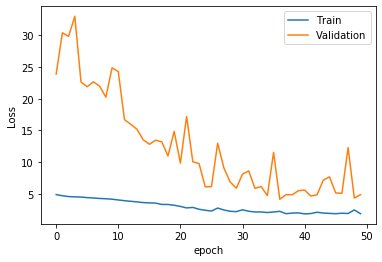

In [30]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.figure()
plt.plot(np.arange(len(train_losses)), train_losses, label='Train')
plt.plot(np.arange(len(valid_losses)), valid_losses, label='Validation')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(loc="best")

In [43]:
train_losses = []
valid_losses = []
num_epochs=50
total_step=10

for epoch in range(num_epochs):  # loop over the dataset multiple times

    # set the model as train mode
    #model.train()
    train_loss = 0.0
    train_counter = 0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, targets = data
        
        image_data1 = inputs[:,:,0:4000].unsqueeze(1)
        meta_data1 = inputs[:,:,4000:4011].squeeze(1)
        desc_featurs1 = inputs[:,:,4011:4061].squeeze(1)
        title_features1 = inputs[:,:,4061:4111].squeeze(1)
        #print(inputs.shape)
        #print(inputs)
        #torch.autograd.set_detect_anomaly(True)
       # if cuda:
        #    inputs, targets = inputs.cuda(), targets.cuda()

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model_res(image_data1)
        #outputs = modelX(image_data1,meta_data1,desc_featurs1,title_features1)
        #print(outputs)
        loss = torch.sqrt(criterion(outputs, targets))
        #print(loss)
        loss.backward()
        #scheduler.step()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
        
        train_loss += (loss.item() * inputs.size(0))
        train_counter += inputs.size(0)
        #print(train_loss)
    train_losses.append(train_loss/train_counter)
    
    # switch to evaluation mode
    #model.eval()
    valid_loss = 0.0
    valid_counter = 0
    with torch.no_grad():
        for i, data in enumerate(validloader, 0):
            # get the inputs
            inputs, targets = data
            inputs, targets = data
            image_data1 = inputs[:,:,0:4000].unsqueeze(1)
            meta_data1 = inputs[:,:,4000:4011].squeeze(1)
            desc_featurs1 = inputs[:,:,4011:4061].squeeze(1)
            title_features1 = inputs[:,:,4061:4111].squeeze(1)

            #if cuda:
             #   inputs, targets = inputs.cuda(), targets.cuda()
            outputs = model_res(image_data1)

            #outputs = modelX(image_data1,meta_data1,desc_featurs1,title_features1)
            loss = criterion(outputs, targets)

            valid_loss += (loss.item() * inputs.size(0))
            valid_counter += inputs.size(0)
    
    valid_losses.append(valid_loss/valid_counter)
    
print('Finished Training')

Epoch [1/50], Step [100/10], Loss: 5.7167
Epoch [2/50], Step [100/10], Loss: 5.1002
Epoch [3/50], Step [100/10], Loss: 5.5348
Epoch [4/50], Step [100/10], Loss: 5.1930
Epoch [5/50], Step [100/10], Loss: 5.7146
Epoch [6/50], Step [100/10], Loss: 6.9077


KeyboardInterrupt: 

In [47]:
from torch import nn
model_seq = nn.Sequential(
             nn.Linear(50, 64),
             nn.ReLU(),
             nn.Linear(64, 1))
             #nn.LogSoftmax(dim=1))



In [58]:
train_losses = []
valid_losses = []
num_epochs=50
total_step=10

for epoch in range(num_epochs):  # loop over the dataset multiple times

    # set the model as train mode
    #model.train()
    train_loss = 0.0
    train_counter = 0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, targets = data
        
        image_data1 = inputs[:,:,0:4000].unsqueeze(1)
        meta_data1 = inputs[:,:,4000:4011].squeeze(1)
        desc_featurs1 = inputs[:,:,4011:4061].squeeze(1)
        title_features1 = inputs[:,:,4061:4111].squeeze(1)
        #print(inputs.shape)
        #print(inputs)
        #torch.autograd.set_detect_anomaly(True)
       # if cuda:
        #    inputs, targets = inputs.cuda(), targets.cuda()

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(desc_featurs1)
        #outputs = modelX(image_data1,meta_data1,desc_featurs1,title_features1)
        #print(outputs)
        loss = torch.sqrt(criterion(outputs, targets))
        #print(loss)
        loss.backward()
        #scheduler.step()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
        
        train_loss += (loss.item() * inputs.size(0))
        train_counter += inputs.size(0)
        #print(train_loss)
    train_losses.append(train_loss/train_counter)
    
    # switch to evaluation mode
    #model.eval()
    valid_loss = 0.0
    valid_counter = 0
    with torch.no_grad():
        for i, data in enumerate(validloader, 0):
            # get the inputs
            inputs, targets = data
            inputs, targets = data
            image_data1 = inputs[:,:,0:4000].unsqueeze(1)
            meta_data1 = inputs[:,:,4000:4011].squeeze(1)
            desc_featurs1 = inputs[:,:,4011:4061].squeeze(1)
            title_features1 = inputs[:,:,4061:4111].squeeze(1)

            #if cuda:
             #   inputs, targets = inputs.cuda(), targets.cuda()
            outputs = net(desc_featurs1)

            #outputs = modelX(image_data1,meta_data1,desc_featurs1,title_features1)
            loss = criterion(outputs, targets)

            valid_loss += (loss.item() * inputs.size(0))
            valid_counter += inputs.size(0)
    
    valid_losses.append(valid_loss/valid_counter)
    
print('Finished Training')

Epoch [1/50], Step [100/10], Loss: 5.1641
Epoch [2/50], Step [100/10], Loss: 5.9443
Epoch [3/50], Step [100/10], Loss: 5.3247
Epoch [4/50], Step [100/10], Loss: 4.8548
Epoch [5/50], Step [100/10], Loss: 5.9760
Epoch [6/50], Step [100/10], Loss: 5.5827
Epoch [7/50], Step [100/10], Loss: 4.3188
Epoch [8/50], Step [100/10], Loss: 4.6956
Epoch [9/50], Step [100/10], Loss: 5.7104
Epoch [10/50], Step [100/10], Loss: 6.0630
Epoch [11/50], Step [100/10], Loss: 5.2526
Epoch [12/50], Step [100/10], Loss: 4.9596
Epoch [13/50], Step [100/10], Loss: 5.6454
Epoch [14/50], Step [100/10], Loss: 6.0705
Epoch [15/50], Step [100/10], Loss: 5.4839
Epoch [16/50], Step [100/10], Loss: 5.5487
Epoch [17/50], Step [100/10], Loss: 5.9557
Epoch [18/50], Step [100/10], Loss: 4.9829
Epoch [19/50], Step [100/10], Loss: 5.3429
Epoch [20/50], Step [100/10], Loss: 5.1841
Epoch [21/50], Step [100/10], Loss: 5.8008
Epoch [22/50], Step [100/10], Loss: 5.2676
Epoch [23/50], Step [100/10], Loss: 5.9573
Epoch [24/50], Step 

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.figure()
plt.plot(np.arange(len(train_losses)), train_losses, label='Train')
plt.plot(np.arange(len(valid_losses)), valid_losses, label='Validation')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(loc="best")